In [2]:
import numpy as np
import pandas as pd
from numpy import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\PhD Work\PhD Papers\About Third Paper\Sieved\Poro_Data.csv")
data.head(50)

KW    S1   S11   S12   S18   S20
0   0.13  0.12  0.16  0.15  0.13  0.19
1   0.13  0.12  0.16  0.15  0.13  0.19
2   0.14  0.12  0.16  0.15  0.13  0.19
3   0.14  0.13  0.14  0.17  0.13  0.19
4   0.13  0.09  0.14  0.16  0.15  0.15
5   0.14  0.09  0.14  0.16  0.15  0.15
6   0.15  0.09  0.14  0.16  0.15  0.15
7   0.14  0.09  0.14  0.16  0.15  0.15
8   0.14  0.09  0.14  0.16  0.15  0.15
9   0.15  0.09  0.14  0.16  0.15  0.15
10  0.15  0.09  0.14  0.16  0.15  0.15
11  0.14  0.09  0.14  0.16  0.15  0.15
12  0.14  0.09  0.14  0.16  0.15  0.15
13  0.16  0.21  0.11  0.23  0.13  0.14
14  0.16  0.21  0.11  0.23  0.13  0.14
15  0.16  0.21  0.11  0.23  0.13  0.14
16  0.15  0.21  0.11  0.23  0.13  0.14
17  0.17  0.21  0.11  0.23  0.13  0.14
18  0.18  0.21  0.11  0.23  0.13  0.14
19  0.19  0.21  0.11  0.23  0.13  0.14
20  0.10  0.21  0.11  0.23  0.13  0.14
21  0.09  0.21  0.11  0.23  0.13  0.14
22  0.09  0.21  0.11  0.23  0.13  0.14
23  0.11  0.21  0.11  0.23  0.13  0.14
24  0.14  0.21  0.11  0.23  0.13  0.14
25  0.15  0.21  0.11  0.23  0.13  0.14
26  0.15  0.21  0.11  0.23  0.13  0.14
27  0.14  0.21  0.11  0.23  0.13  0.14
28  0.13  0.21  0.11  0.23  0.13  0.14
29  0.13  0.21  0.11  0.23  0.13  0.14
30  0.14  0.21  0.11  0.23  0.13  0.14
31  0.13  0.21  0.11  0.23  0.13  0.14
32  0.12  0.21  0.11  0.23  0.13  0.14
33  0.12  0.21  0.11  0.23  0.13  0.14
34  0.12  0.21  0.11  0.23  0.13  0.14
35  0.11  0.21  0.11  0.23  0.13  0.14
36  0.10  0.21  0.11  0.23  0.13  0.14
37  0.18  0.21  0.11  0.23  0.13  0.14
38  0.17  0.21  0.11  0.23  0.13  0.14
39  0.18  0.21  0.11  0.23  0.13  0.14
40  0.19  0.21  0.11  0.23  0.13  0.14
41  0.18  0.21  0.11  0.23  0.13  0.14
42  0.17  0.21  0.11  0.23  0.13  0.14
43  0.16  0.21  0.11  0.23  0.13  0.14
44  0.17  0.21  0.11  0.23  0.13  0.14
45  0.19  0.21  0.11  0.23  0.13  0.14
46  0.19  0.21  0.11  0.23  0.13  0.14
47  0.18  0.18  0.18  0.14  0.21  0.26
48  0.16  0.18  0.18  0.14  0.21  0.26
49  0.14  0.18  0.18  0.14  0.21  0.26

In [ ]:
# Using Data for Analysis: This comprise Synthetic Data generated from same location as Well 15/9-F-11-B

In [4]:
# For Multiple linear regression model
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data.loc[:, data.columns != 'KW']
Y = data.loc[:, 'KW']
Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 5, test_size=0.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.03391857184227281, RMSE:0.04104464014769995


In [5]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0      0.19   0.196757
1      0.24   0.212447
2      0.25   0.206957
3      0.20   0.189826
4      0.17   0.212447
..      ...        ...
109    0.21   0.194717
110    0.24   0.218944
111    0.26   0.213467
112    0.28   0.200642
113    0.20   0.202750

[114 rows x 2 columns]

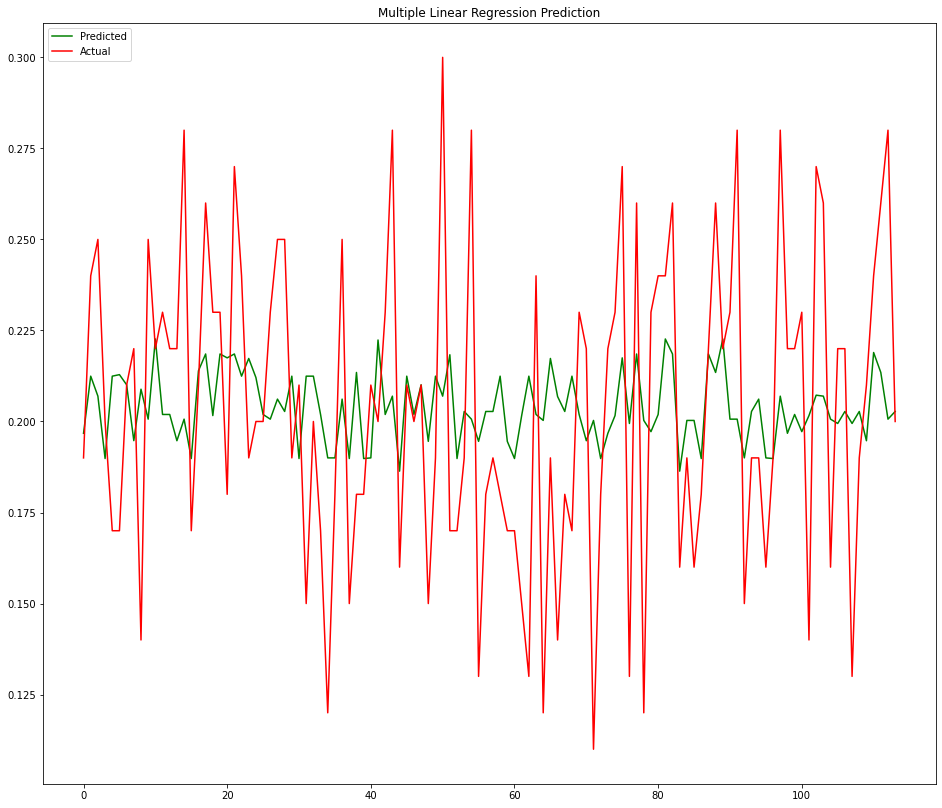

In [7]:
from pylab import rcParams
import matplotlib

pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Multiple Linear Regression Prediction")
rcParams['figure.figsize'] = 16, 14

In [614]:
# For Extreme Gradient Boost 

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data.loc[:, data.columns != 'KW']
Y = data.loc[:, 'KW']
Model = XGBRegressor(verbosity=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.020901970891227504, RMSE:0.028861119759259556


In [615]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0      0.18   0.192220
1      0.17   0.158847
2      0.18   0.192909
3      0.19   0.246022
4      0.19   0.230621
..      ...        ...
166    0.27   0.268306
167    0.20   0.192793
168    0.17   0.226474
169    0.27   0.246022
170    0.22   0.226474

[171 rows x 2 columns]

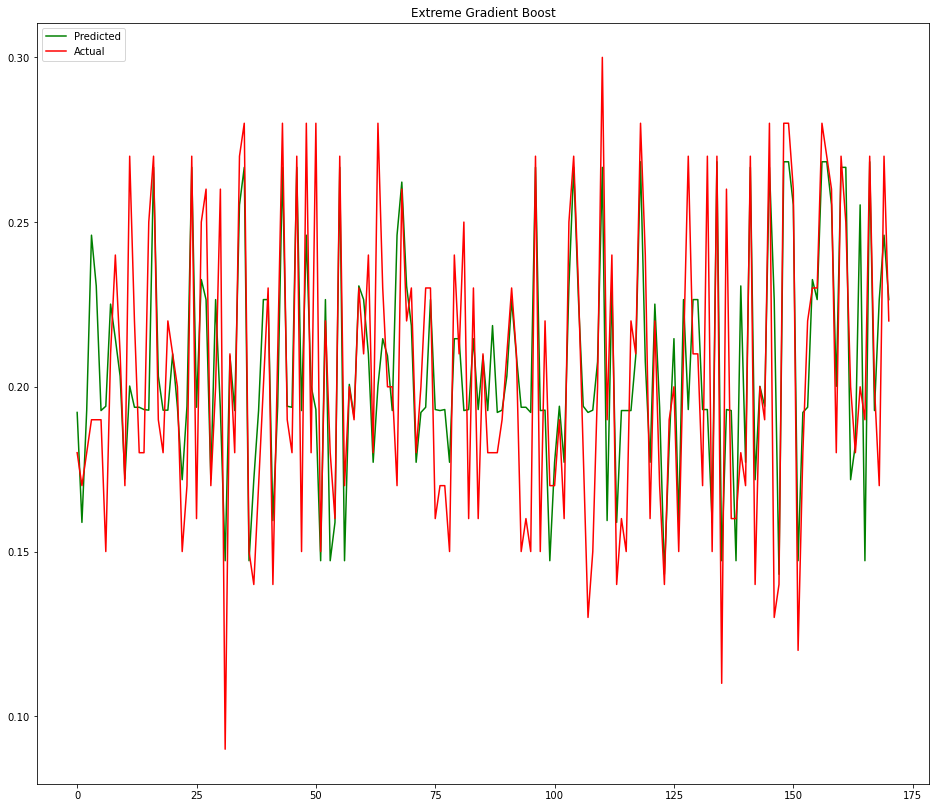

In [616]:
from pylab import rcParams
import matplotlib

pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Extreme Gradient Boost")
rcParams['figure.figsize'] = 16, 14

In [12]:
# For Neural Network

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data.loc[:, data.columns != 'KW']
Y = data.loc[:, 'KW']
model = Sequential()
# Add the first hidden layer
model. add(Dense(64, activation='sigmoid', input_dim=5))
# Add the second hidden layer
model.add(Dense(16, activation='relu'))
# Add the third hidden layer
model.add(Dense(4, activation='relu'))
# Add the fourth hidden layer
#model.add(Dense(25, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='relu'))
# compile the model
model.compile(optimizer='adam',loss='mse')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10)
# Train the model for 200 epochs
model.fit(X_train, Y_train, epochs=100, batch_size = 8, validation_data=(X_val, Y_val))
predictions = model.predict({'Predicted':X_test})
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

Epoch 1/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/100
115/115 [==============================] - 0s 973us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 10/100
115/115 [==============================] - 0s 1ms/step - loss: 0.0021 - val_

In [13]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0      0.21   0.220324
1      0.20   0.223956
2      0.20   0.221067
3      0.21   0.217269
4      0.26   0.209487
..      ...        ...
109    0.20   0.209487
110    0.17   0.210255
111    0.19   0.204593
112    0.22   0.223956
113    0.13   0.217238

[114 rows x 2 columns]

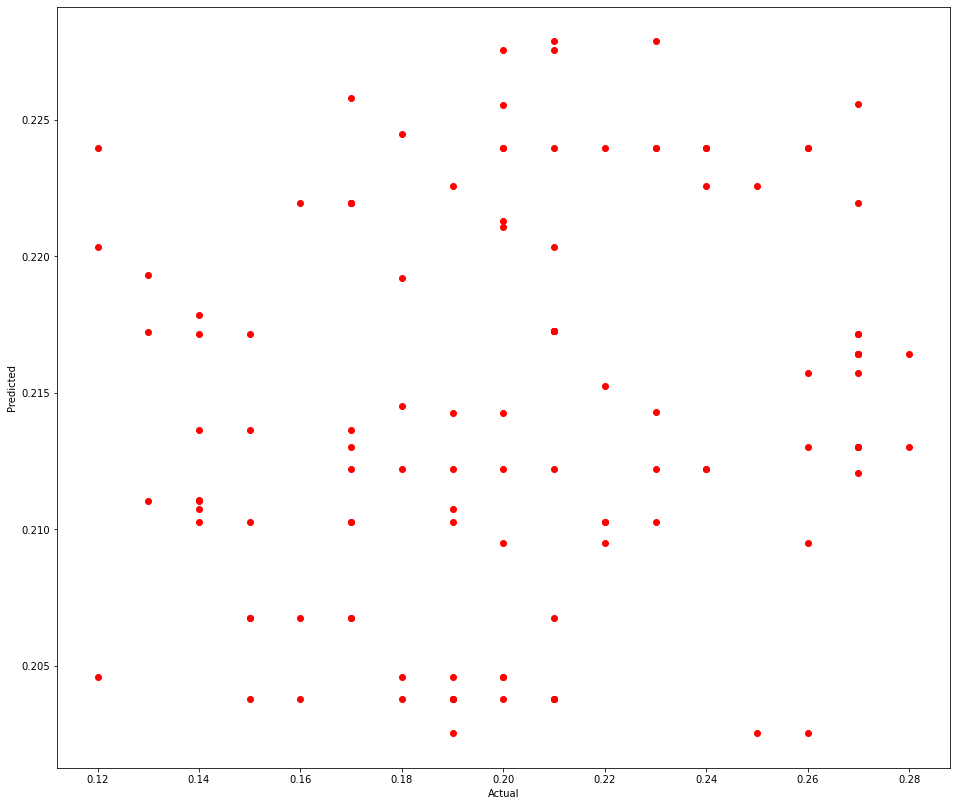

In [14]:
df1 = pd.DataFrame(Y_test)
df2 = pd.DataFrame(predictions)
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Diagram = plt.scatter(df1, df2, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

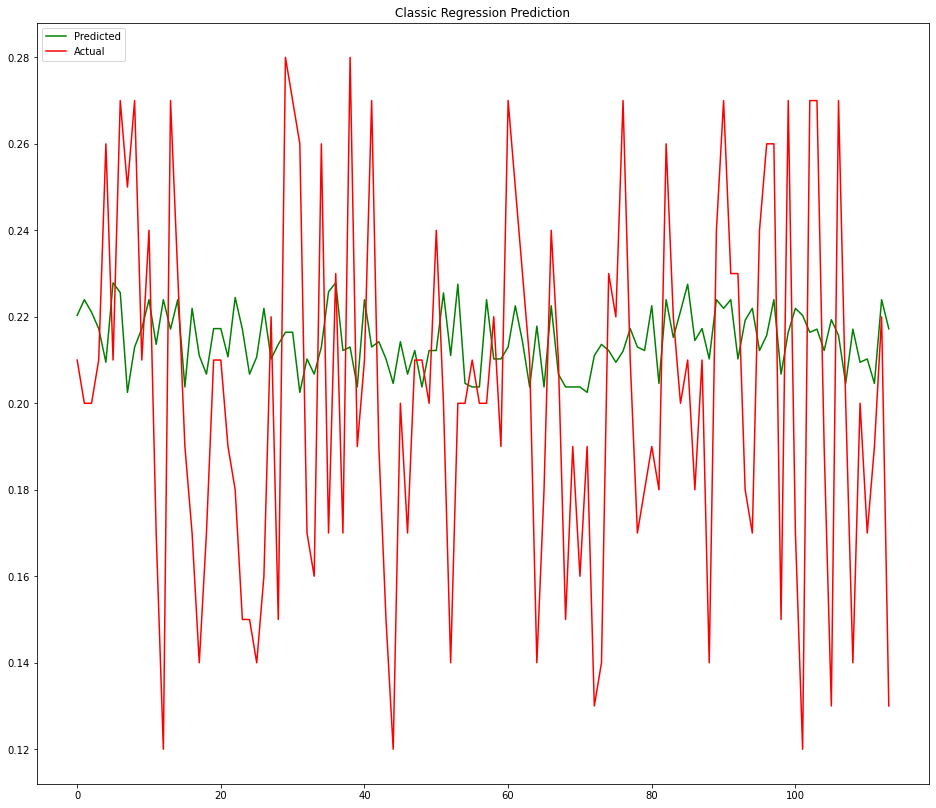

In [15]:
from pylab import rcParams
import matplotlib

pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Classic Regression Prediction")
rcParams['figure.figsize'] = 16, 14

In [73]:
# For decision tree analysis

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn.ensemble as ml

X = data.drop(['KW'], axis=1)
y = data['KW']
model = DecisionTreeRegressor(max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.02139626780684755, RMSE:0.027654273446518555


In [74]:
df1 = pd.DataFrame({'Actual': y_test})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.19   0.190516
1     0.24   0.191463
2     0.25   0.267500
3     0.20   0.190516
4     0.17   0.191463
5     0.17   0.150000
6     0.21   0.208824
7     0.22   0.210000
8     0.14   0.143333
9     0.25   0.239310
10    0.22   0.222857
11    0.23   0.215111
12    0.22   0.215111
13    0.22   0.217308
14    0.28   0.239310
15    0.17   0.190516
16    0.21   0.217500
17    0.26   0.225570
18    0.23   0.160000
19    0.23   0.225570
20    0.18   0.221429
21    0.27   0.225570
22    0.24   0.191463
23    0.19   0.231765
24    0.20   0.204091
25    0.20   0.215111
26    0.23   0.239310
27    0.25   0.231364
28    0.25   0.197000
29    0.19   0.191463
30    0.21   0.190516
31    0.15   0.191463
32    0.20   0.191463
33    0.17   0.215111
34    0.12   0.178108
35    0.18   0.178108
36    0.25   0.231364
37    0.15   0.190516
38    0.18   0.192174
39    0.18   0.190516
40    0.21   0.178108
41    0.20   0.200714
42    0.23   0.215111
43    0.28   0.267500
44    0.16   0.196129
45    0.21   0.191463
46    0.20   0.215111
47    0.21   0.208824
48    0.15   0.160667
49    0.19   0.191463
50    0.30   0.267500
51    0.17   0.218333
52    0.17   0.190516
53    0.19   0.197000
54    0.28   0.239310
55    0.13   0.160667
56    0.18   0.197000

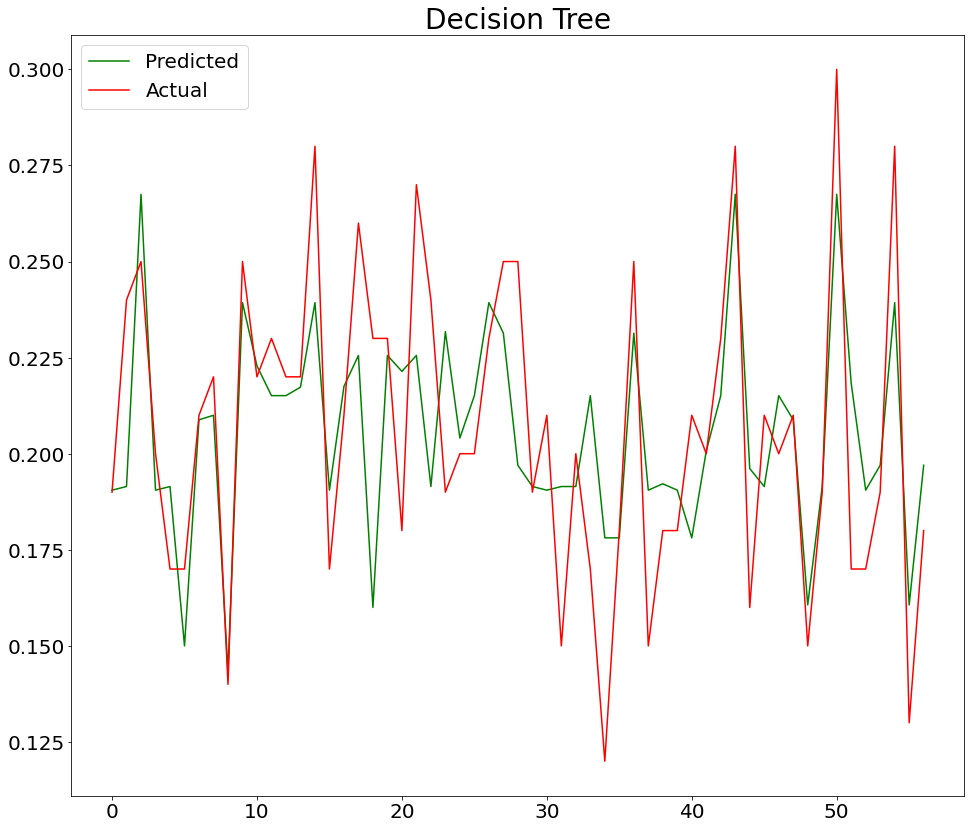

In [76]:
from pylab import rcParams

plt.plot(predictions, color='g', label='Predicted')
plt.plot(y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Decision Tree", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [68]:
# for Random forest Analysis

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data.drop(['KW'], axis=1)
y = data['KW']
models = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
model.fit(X_train, y_train)
models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.01605890901496169, RMSE:0.02353400246121479


In [69]:
df1 = pd.DataFrame({'Actual': y_test})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.21   0.212485
1     0.20   0.200929
2     0.20   0.198887
3     0.21   0.210600
4     0.26   0.226783
5     0.21   0.219697
6     0.27   0.239922
7     0.25   0.246346
8     0.27   0.268132
9     0.21   0.210600
10    0.24   0.200929
11    0.17   0.161050
12    0.12   0.200929
13    0.27   0.205553
14    0.23   0.200929
15    0.19   0.200044
16    0.17   0.170212
17    0.14   0.156722
18    0.17   0.163091
19    0.21   0.210600
20    0.21   0.210600
21    0.19   0.170675
22    0.18   0.196573
23    0.15   0.205553
24    0.15   0.163091
25    0.14   0.170675
26    0.16   0.170212
27    0.22   0.176948
28    0.15   0.161050
29    0.28   0.264340
30    0.27   0.264340
31    0.26   0.246346
32    0.17   0.176948
33    0.16   0.163091
34    0.26   0.268132
35    0.17   0.191029
36    0.23   0.219697
37    0.17   0.208050
38    0.28   0.268132
39    0.19   0.200044
40    0.21   0.200929
41    0.27   0.268132
42    0.19   0.195859
43    0.15   0.176948
44    0.12   0.161213
45    0.20   0.195859
46    0.17   0.163091
47    0.21   0.208050
48    0.21   0.200044
49    0.20   0.208050
50    0.24   0.208050
51    0.20   0.194998
52    0.14   0.165989
53    0.20   0.201900
54    0.20   0.161213
55    0.21   0.200044
56    0.20   0.200044

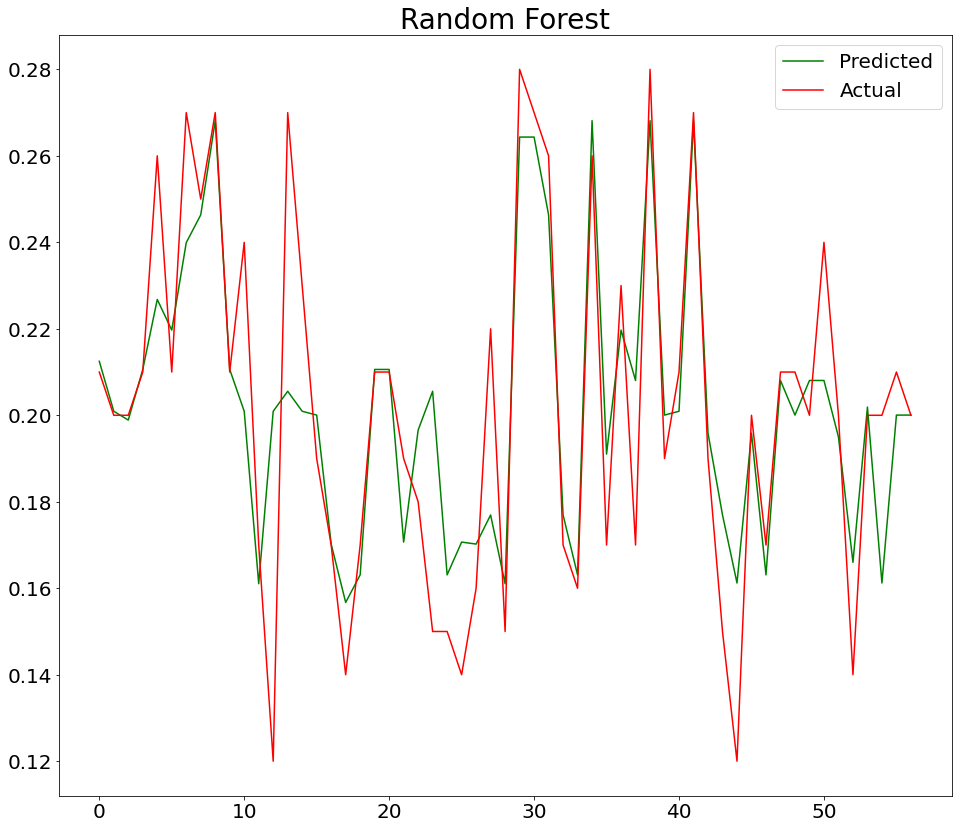

In [72]:
from pylab import rcParams

plt.plot(predictions, color='g', label='Predicted')
plt.plot(y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Random Forest", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [77]:
# for K-Nearest Neighbor Analysis

import sklearn.svm as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

models = KNeighborsRegressor(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.05)
model.fit(X_train, y_train)

models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.01903508771929825, RMSE:0.02745810205423989


In [78]:
df1 = pd.DataFrame({'Actual': y_test})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.21      0.245
1     0.20      0.220
2     0.20      0.195
3     0.21      0.210
4     0.26      0.225
5     0.21      0.220
6     0.27      0.220
7     0.25      0.255
8     0.27      0.265
9     0.21      0.210
10    0.24      0.220
11    0.17      0.160
12    0.12      0.220
13    0.27      0.210
14    0.23      0.220
15    0.19      0.190
16    0.17      0.165
17    0.14      0.180
18    0.17      0.160
19    0.21      0.210
20    0.21      0.210
21    0.19      0.165
22    0.18      0.225
23    0.15      0.210
24    0.15      0.160
25    0.14      0.165
26    0.16      0.165
27    0.22      0.195
28    0.15      0.160
29    0.28      0.275
30    0.27      0.275
31    0.26      0.255
32    0.17      0.195
33    0.16      0.160
34    0.26      0.265
35    0.17      0.220
36    0.23      0.220
37    0.17      0.190
38    0.28      0.265
39    0.19      0.190
40    0.21      0.220
41    0.27      0.265
42    0.19      0.195
43    0.15      0.195
44    0.12      0.160
45    0.20      0.195
46    0.17      0.160
47    0.21      0.190
48    0.21      0.190
49    0.20      0.190
50    0.24      0.190
51    0.20      0.200
52    0.14      0.155
53    0.20      0.185
54    0.20      0.160
55    0.21      0.190
56    0.20      0.190

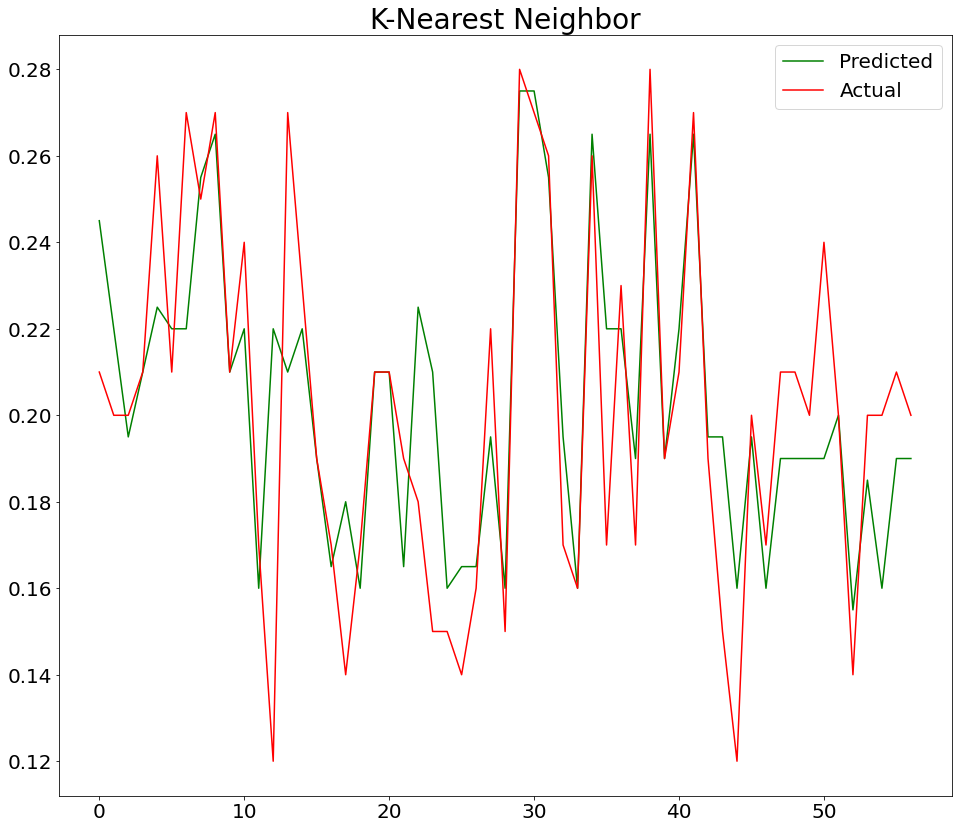

In [79]:
from pylab import rcParams

plt.plot(predictions, color='g', label='Predicted')
plt.plot(y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("K-Nearest Neighbor", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

<AxesSubplot:>

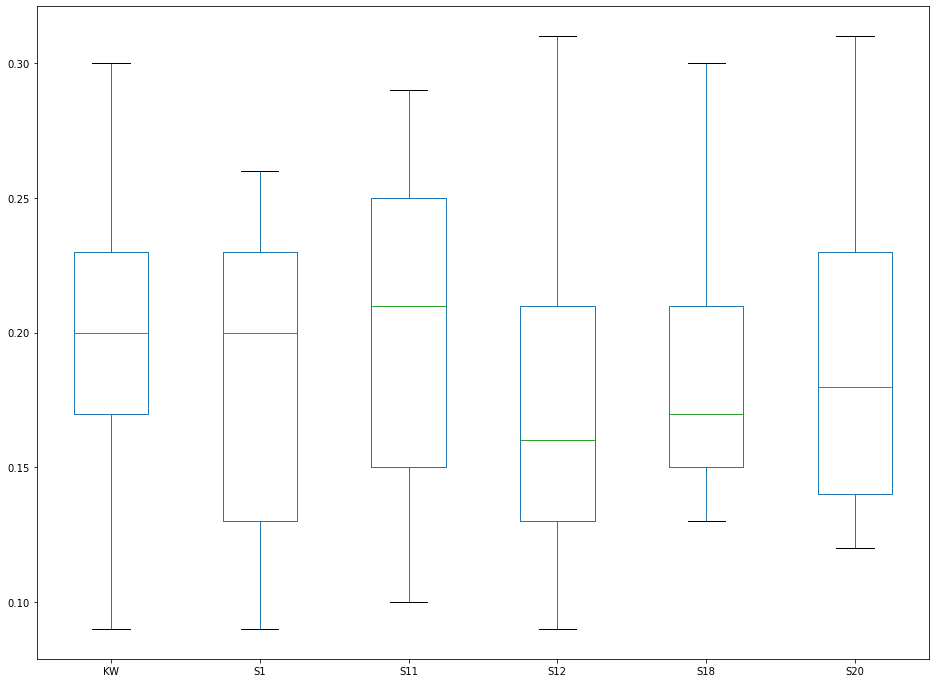

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot.box(figsize=(16,12))

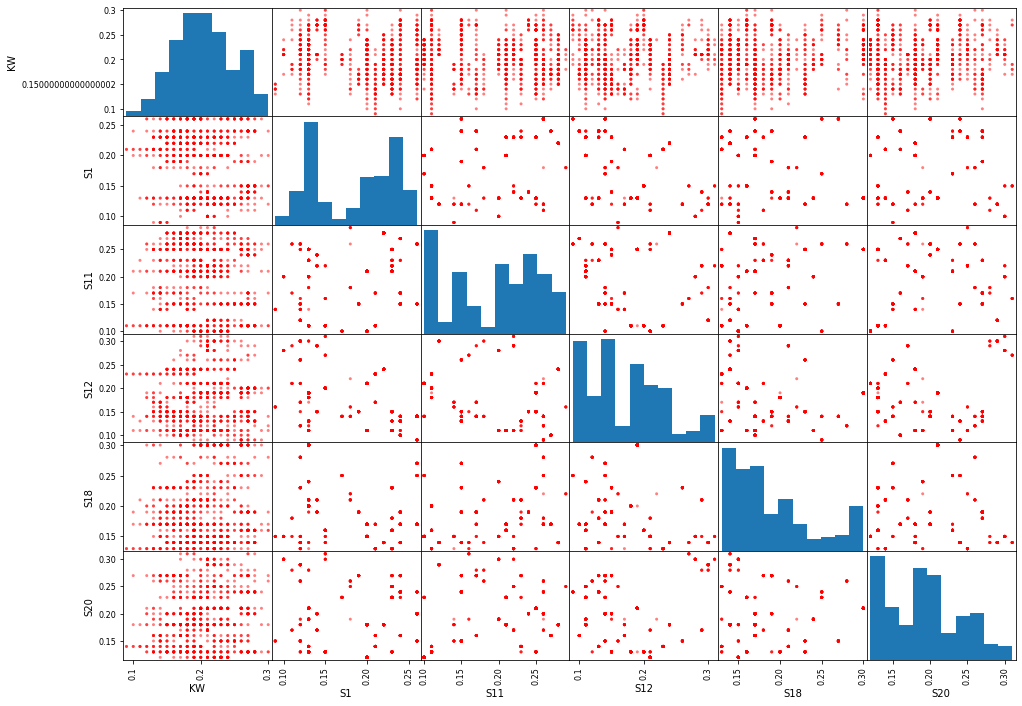

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

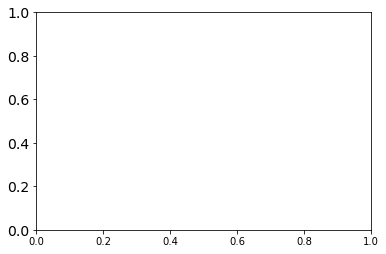

In [148]:
from pandas.plotting import scatter_matrix

data.corr()
data.corr()['KW'].sort_values(ascending=False)
scatter_matrix(data, figsize=(16,12), color='r')
plt.show()
plt.yticks(fontsize=14)

In [151]:
shade = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(shade)
shade[triangle_indices] = True
shade

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

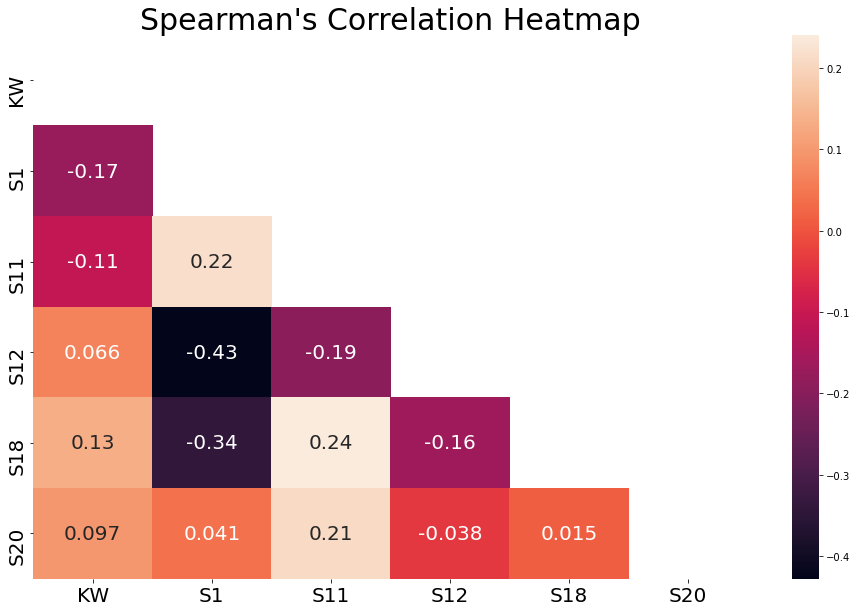

In [152]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=shade, annot=True, annot_kws={"size":20})
plt.show
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Spearman's Correlation Heatmap", fontsize=30)
plt.show()

In [ ]:
# Part Two

In [ ]:
# Using Data2 for Analysis: This comprise Synthetic Data generated from same location as Well 15/9-F-11-T2

In [33]:
data2 = pd.read_csv(r"C:\PhD Work\PhD Papers\About Third Paper\Sieved\Poro_Data2.csv")
data2.head(50)

KW    S5   S11   S12   S13   S15
0   0.21  0.23  0.25  0.14  0.19  0.21
1   0.21  0.23  0.25  0.14  0.19  0.21
2   0.21  0.23  0.25  0.14  0.19  0.21
3   0.20  0.23  0.25  0.14  0.19  0.21
4   0.20  0.28  0.18  0.25  0.14  0.15
5   0.20  0.15  0.16  0.19  0.14  0.17
6   0.21  0.15  0.16  0.19  0.14  0.17
7   0.22  0.17  0.20  0.21  0.15  0.20
8   0.22  0.17  0.20  0.21  0.15  0.20
9   0.21  0.17  0.23  0.12  0.16  0.25
10  0.20  0.17  0.23  0.12  0.16  0.25
11  0.21  0.17  0.23  0.12  0.16  0.25
12  0.21  0.17  0.23  0.12  0.16  0.25
13  0.21  0.17  0.23  0.12  0.16  0.25
14  0.21  0.17  0.23  0.12  0.16  0.25
15  0.22  0.17  0.23  0.12  0.16  0.25
16  0.22  0.17  0.23  0.12  0.16  0.25
17  0.22  0.17  0.23  0.12  0.16  0.25
18  0.22  0.17  0.23  0.12  0.16  0.25
19  0.21  0.19  0.24  0.13  0.23  0.13
20  0.21  0.19  0.24  0.13  0.23  0.13
21  0.20  0.19  0.24  0.13  0.23  0.13
22  0.20  0.19  0.24  0.13  0.23  0.13
23  0.20  0.19  0.24  0.13  0.23  0.13
24  0.20  0.19  0.24  0.13  0.23  0.13
25  0.20  0.19  0.24  0.13  0.23  0.13
26  0.21  0.19  0.24  0.13  0.23  0.13
27  0.21  0.19  0.24  0.13  0.23  0.13
28  0.21  0.19  0.24  0.13  0.23  0.13
29  0.20  0.19  0.24  0.13  0.23  0.13
30  0.21  0.19  0.24  0.13  0.23  0.13
31  0.21  0.19  0.24  0.13  0.23  0.13
32  0.21  0.19  0.24  0.13  0.23  0.13
33  0.21  0.19  0.24  0.13  0.23  0.13
34  0.20  0.19  0.24  0.13  0.23  0.13
35  0.20  0.19  0.24  0.13  0.23  0.13
36  0.20  0.19  0.24  0.13  0.23  0.13
37  0.20  0.19  0.24  0.13  0.23  0.13
38  0.21  0.19  0.24  0.13  0.23  0.13
39  0.21  0.22  0.17  0.13  0.26  0.21
40  0.21  0.22  0.17  0.13  0.26  0.21
41  0.21  0.22  0.17  0.13  0.26  0.21
42  0.21  0.22  0.17  0.13  0.26  0.21
43  0.22  0.22  0.17  0.13  0.26  0.21
44  0.22  0.22  0.17  0.13  0.26  0.21
45  0.21  0.22  0.17  0.13  0.26  0.21
46  0.21  0.22  0.17  0.13  0.26  0.21
47  0.22  0.22  0.17  0.13  0.26  0.21
48  0.22  0.22  0.17  0.13  0.26  0.21
49  0.22  0.22  0.17  0.13  0.26  0.21

In [35]:
# For Multiple linear regression model

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data2.loc[:, data.columns != 'KW']
Y = data2.loc[:, 'KW']
Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.03916923713464823, RMSE:0.05038702664254993


In [36]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.22   0.189692
1     0.24   0.211444
2     0.24   0.248362
3     0.15   0.226945
4     0.24   0.206426
5     0.21   0.211444
6     0.12   0.204015
7     0.18   0.218262
8     0.20   0.197567
9     0.21   0.204011
10    0.20   0.189476
11    0.30   0.248362
12    0.22   0.192980
13    0.11   0.189692
14    0.19   0.179589
15    0.17   0.198730
16    0.38   0.248362
17    0.20   0.179589
18    0.08   0.189692
19    0.19   0.218566
20    0.20   0.204015
21    0.20   0.221315
22    0.16   0.214017
23    0.11   0.189692
24    0.16   0.188736
25    0.23   0.201526
26    0.21   0.228731
27    0.23   0.201017
28    0.23   0.201526
29    0.14   0.226945
30    0.18   0.198730
31    0.25   0.211444
32    0.27   0.198730
33    0.23   0.221357
34    0.15   0.196134

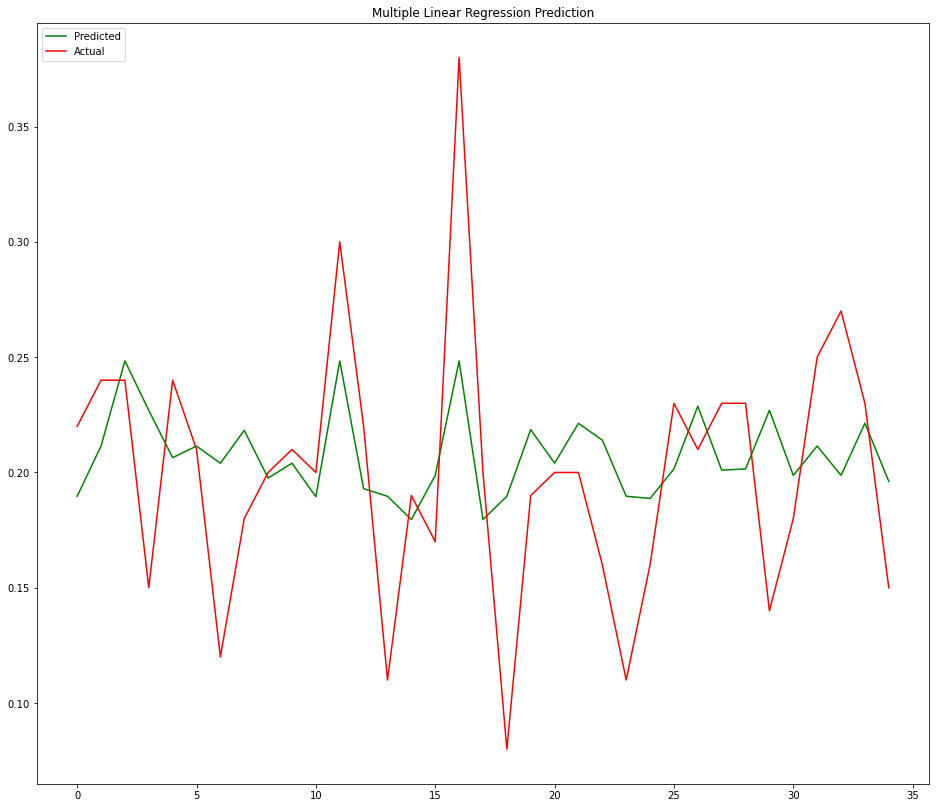

In [37]:
from pylab import rcParams
import matplotlib

pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Multiple Linear Regression Prediction")
rcParams['figure.figsize'] = 16, 14

In [38]:
# For Neural Network analysis

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

X = data2.loc[:, data.columns != 'KW']
Y = data2.loc[:, 'KW']
model = Sequential()
# Add the first hidden layer
model. add(Dense(200, activation='relu', input_dim=5))
# Add the second hidden layer
model.add(Dense(100, activation='relu'))
# Add the third hidden layer
model.add(Dense(50, activation='relu'))
# Add the fourth hidden layer
model.add(Dense(25, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam',loss='mse')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.05)
# Train the model for 200 epochs
model.fit(X_train, Y_train, epochs=200, batch_size = 8, validation_data=(X_val, Y_val))
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict({'Predicted':X_test})
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

Epoch 1/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0027
Epoch 2/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 3/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 4/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 5/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 6/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 7/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 9/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 10/200
79/79 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 11/

In [39]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.24   0.209178
1     0.26   0.234536
2     0.24   0.209178
3     0.23   0.212051
4     0.21   0.211659
5     0.22   0.197942
6     0.18   0.198084
7     0.20   0.207306
8     0.21   0.197942
9     0.24   0.221603
10    0.19   0.202090
11    0.23   0.207306
12    0.21   0.158886
13    0.18   0.197942
14    0.21   0.225649
15    0.21   0.226825
16    0.24   0.211331
17    0.21   0.197942
18    0.17   0.201041
19    0.26   0.234536
20    0.26   0.234536
21    0.15   0.209178
22    0.22   0.209178
23    0.13   0.158886
24    0.19   0.205983
25    0.16   0.158886
26    0.25   0.234536
27    0.20   0.190687
28    0.17   0.169371
29    0.15   0.167955
30    0.11   0.169371
31    0.15   0.219594
32    0.20   0.211987
33    0.20   0.198426
34    0.18   0.201041

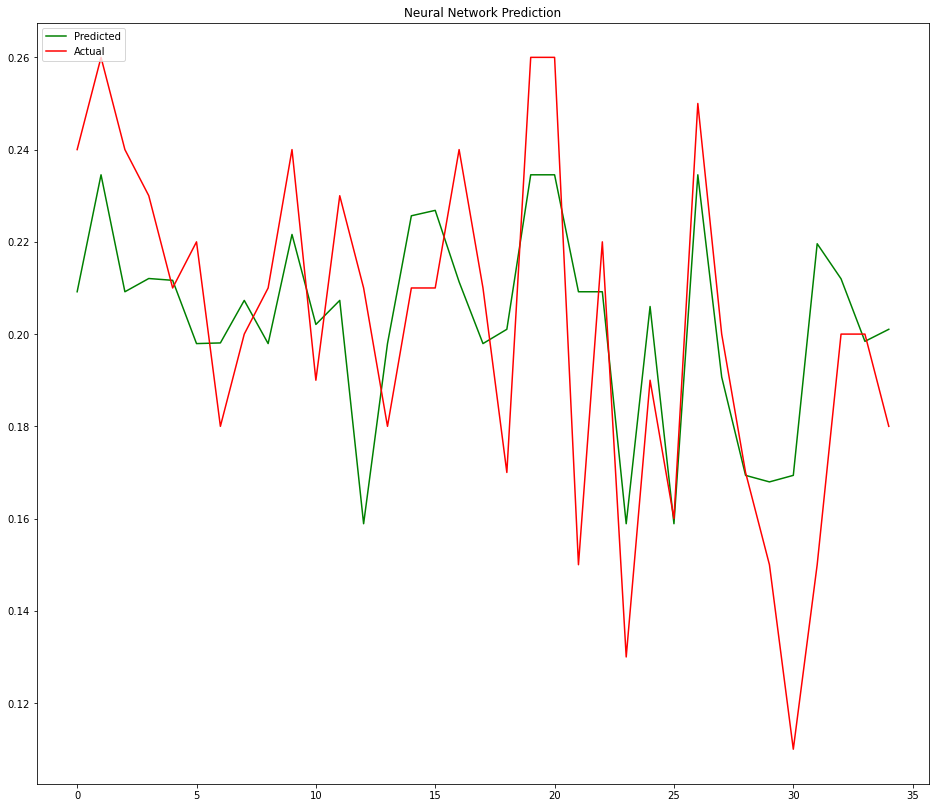

In [40]:
from pylab import rcParams
import matplotlib

pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

In [320]:
# For Extreme Gradient Boost 

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data2.loc[:, data2.columns != 'KW']
Y = data2.loc[:, 'KW']
Model = XGBRegressor(verbosity=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.031027378584657393, RMSE:0.047113096206257886


In [321]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.24   0.228330
1     0.18   0.212907
2     0.21   0.204400
3     0.18   0.200688
4     0.38   0.216359
..     ...        ...
65    0.21   0.203923
66    0.17   0.200688
67    0.22   0.275476
68    0.23   0.195461
69    0.24   0.193410

[70 rows x 2 columns]

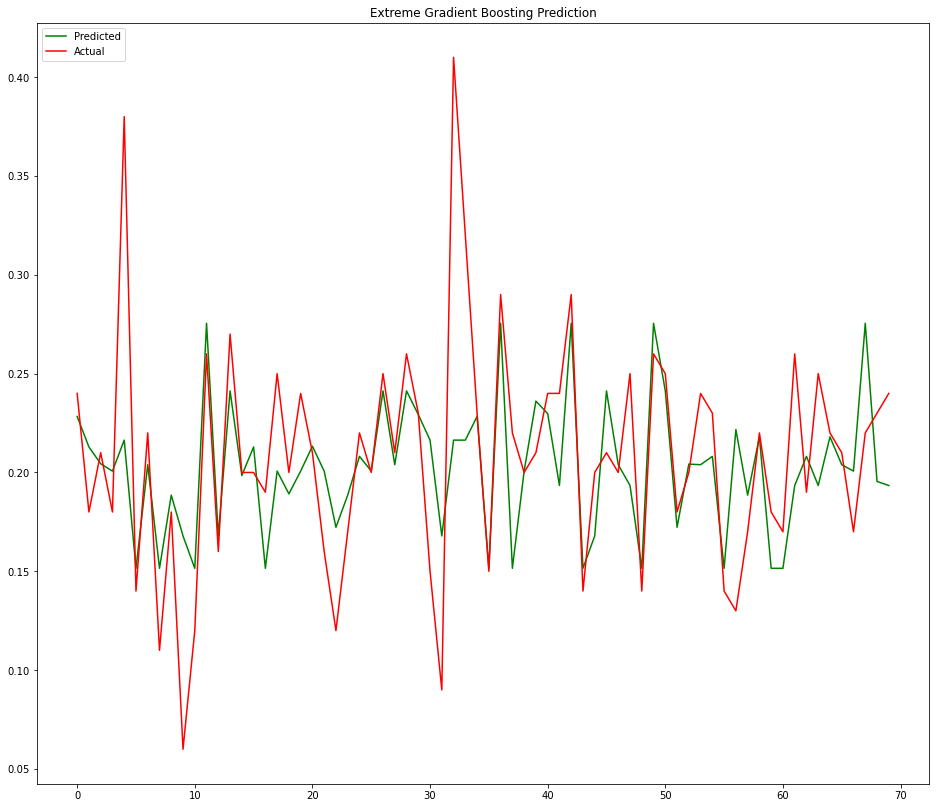

In [322]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Extreme Gradient Boosting Prediction")
rcParams['figure.figsize'] = 16, 14

In [41]:
# For decision tree analysis

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn.ensemble as ml

X = data2.drop(['KW'], axis=1)
y = data2['KW']
model = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.05)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.03923708403412182, RMSE:0.04942192936288652


In [42]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.24   0.205652
1     0.26   0.243793
2     0.24   0.152800
3     0.23   0.228333
4     0.21   0.160435
5     0.22   0.186000
6     0.18   0.205556
7     0.20   0.212222
8     0.21   0.207692
9     0.24   0.212222
10    0.19   0.205652
11    0.23   0.152800
12    0.21   0.152800
13    0.18   0.183750
14    0.21   0.201552
15    0.21   0.201552
16    0.24   0.200000
17    0.21   0.201552
18    0.17   0.190000
19    0.26   0.225455
20    0.26   0.171200
21    0.15   0.183750
22    0.22   0.243793
23    0.13   0.203077
24    0.19   0.205556
25    0.16   0.210000
26    0.25   0.274054
27    0.20   0.210000
28    0.17   0.203077
29    0.15   0.208947
30    0.11   0.225455
31    0.15   0.243793
32    0.20   0.152800
33    0.20   0.152800
34    0.18   0.274054

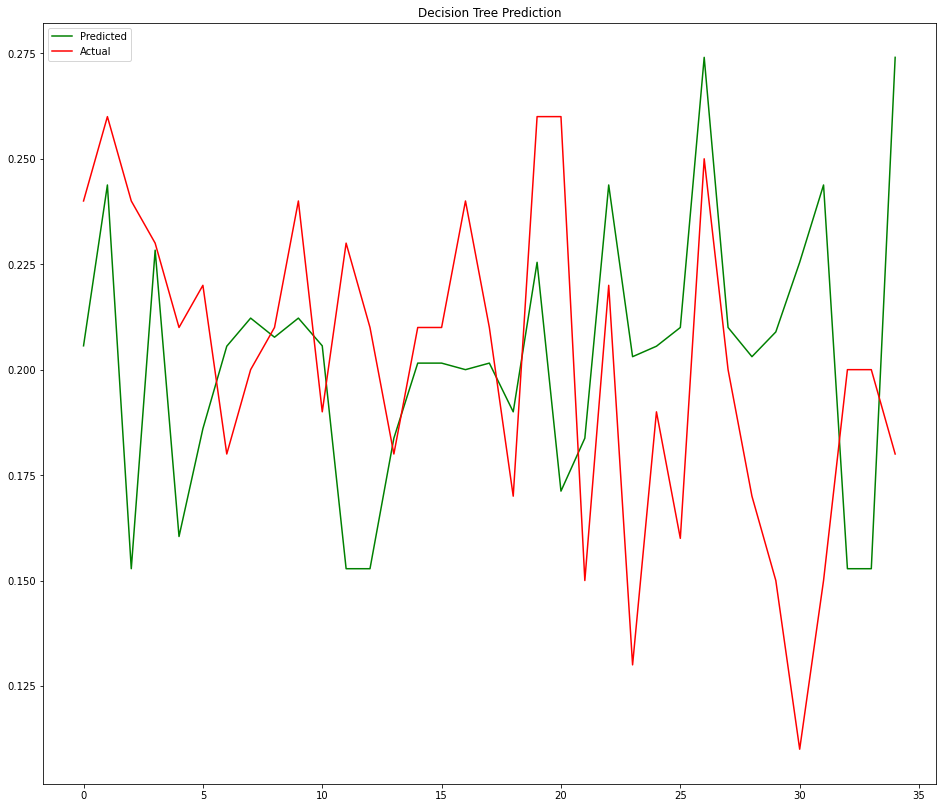

In [43]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Decision Tree Prediction")
rcParams['figure.figsize'] = 16, 14

In [533]:
# for K-Nearest Neighbor Analysis

import sklearn.svm as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

models = KNeighborsRegressor(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.1)
model.fit(X_train, y_train)

models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.030928571428571423, RMSE:0.06148460899165857


In [534]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.25      0.260
1     0.16      0.180
2     0.14      0.120
3     0.27      0.180
4     0.22      0.215
5     0.24      0.185
6     0.16      0.205
7     0.21      0.190
8     0.18      0.240
9     0.24      0.215
10    0.23      0.125
11    0.15      0.200
12    0.26      0.150
13    0.17      0.210
14    0.18      0.195
15    0.19      0.125
16    0.22      0.195
17    0.22      0.215
18    0.20      0.190
19    0.18      0.135
20    0.17      0.260
21    0.21      0.215
22    0.25      0.190
23    0.21      0.230
24    0.26      0.195
25    0.22      0.210
26    0.23      0.125
27    0.21      0.180
28    0.21      0.180
29    0.10      0.215
30    0.27      0.210
31    0.24      0.180
32    0.20      0.190
33    0.20      0.125
34    0.22      0.150
35    0.23      0.215
36    0.21      0.190
37    0.16      0.125
38    0.12      0.205
39    0.15      0.215
40    0.20      0.200
41    0.19      0.195
42    0.24      0.205
43    0.26      0.185
44    0.23      0.210
45    0.18      0.215
46    0.15      0.210
47    0.20      0.180
48    0.17      0.180
49    0.19      0.125
50    0.19      0.150
51    0.21      0.125
52    0.28      0.210
53    0.12      0.190
54    0.25      0.260
55    0.15      0.215
56    0.15      0.125
57    0.25      0.195
58    0.08      0.210
59    0.22      0.205
60    0.27      0.200
61    0.16      0.195
62    0.19      0.240
63    0.23      0.210
64    0.17      0.200
65    0.19      0.245
66    0.17      0.150
67    0.22      0.210
68    0.26      0.215
69    0.17      0.195

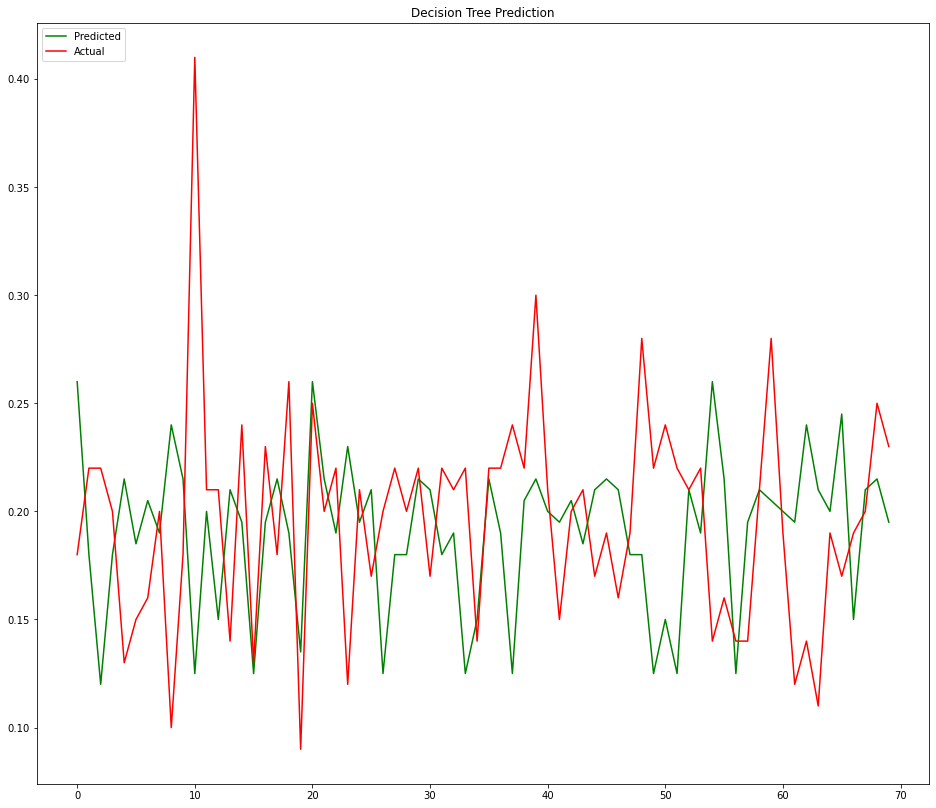

In [228]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Decision Tree Prediction")
rcParams['figure.figsize'] = 16, 14

In [536]:
# for Random forest Analysis

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data2.loc[:, data2.columns != 'KW']
y = data2.loc[:, 'KW']
models = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
model.fit(X_train, y_train)
models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.024422042794507076, RMSE:0.03999777612830335


In [537]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.25   0.261723
1     0.16   0.192457
2     0.14   0.164955
3     0.27   0.192457
4     0.22   0.211098
5     0.24   0.203079
6     0.16   0.193940
7     0.21   0.186834
8     0.18   0.235953
9     0.24   0.224707
10    0.23   0.258032
11    0.15   0.202708
12    0.26   0.143383
13    0.17   0.210665
14    0.18   0.201017
15    0.19   0.258032
16    0.22   0.198747
17    0.22   0.210542
18    0.20   0.186834
19    0.18   0.192711
20    0.17   0.261723
21    0.21   0.215705
22    0.25   0.186834
23    0.21   0.216357
24    0.26   0.194742
25    0.22   0.188797
26    0.23   0.258032
27    0.21   0.201510
28    0.21   0.192457
29    0.10   0.233299
30    0.27   0.188797
31    0.24   0.201510
32    0.20   0.186834
33    0.20   0.258032
34    0.22   0.143383
35    0.23   0.233299
36    0.21   0.186834
37    0.16   0.258032
38    0.12   0.206735
39    0.15   0.233299
40    0.20   0.201921
41    0.19   0.201017
42    0.24   0.204670
43    0.26   0.185795
44    0.23   0.188797
45    0.18   0.210542
46    0.15   0.188797
47    0.20   0.201510
48    0.17   0.192457
49    0.19   0.258032
50    0.19   0.143383
51    0.21   0.258032
52    0.28   0.201605
53    0.12   0.186834
54    0.25   0.261723
55    0.15   0.215705
56    0.15   0.258032
57    0.25   0.194742
58    0.08   0.201605
59    0.22   0.204670
60    0.27   0.204757
61    0.16   0.201017
62    0.19   0.235953
63    0.23   0.215291
64    0.17   0.202708
65    0.19   0.252214
66    0.17   0.143383
67    0.22   0.217849
68    0.26   0.233299
69    0.17   0.198747

In [283]:
# for SVM Analysis

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data2.loc[:, data2.columns != 'KW']
y = data2.loc[:, 'KW']

models = SVR(kernel='rbf', C=1e2, gamma=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model.fit(X_train, y_train)

models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.03155581908092558, RMSE:0.04240623809008764


In [284]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0      0.11   0.221759
1      0.14   0.223311
2      0.30   0.213342
3      0.19   0.225778
4      0.24   0.230617
..      ...        ...
166    0.07        NaN
167    0.32        NaN
168    0.15        NaN
169    0.15        NaN
170    0.32        NaN

[171 rows x 2 columns]

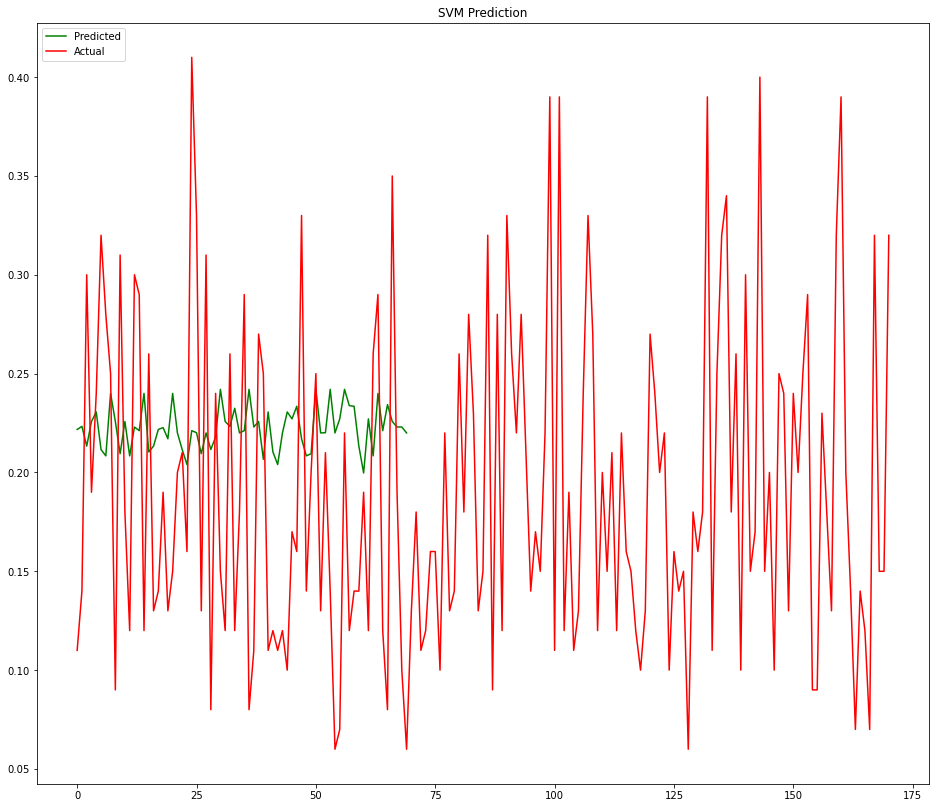

In [285]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("SVM Prediction")
rcParams['figure.figsize'] = 16, 14

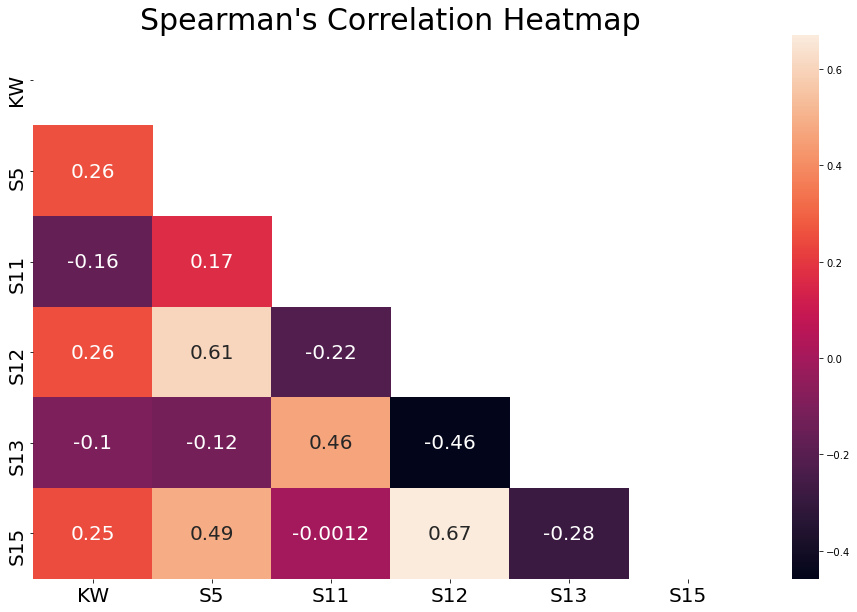

In [229]:
plt.figure(figsize=(16,10))
sns.heatmap(data2.corr(), mask=shade, annot=True, annot_kws={"size":20})
plt.show
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Spearman's Correlation Heatmap", fontsize=30)
plt.show()

In [ ]:
# Using Data 3 for Analysis: This comprise Synthetic Data of density-porosity using a CONSTANT Bulk density for F/9-11-B.

In [45]:
data3 = pd.read_csv(r"C:\PhD Work\PhD Papers\About Third Paper\Sieved\Poro_Data3.csv")
data3.head(50)

KW  Bulk 2.0  Bulk 2.05  Bulk 2.1
0   0.28      0.35       0.29      0.29
1   0.29      0.35       0.29      0.29
2   0.29      0.35       0.29      0.29
3   0.29      0.24       0.26      0.23
4   0.29      0.29       0.24      0.28
5   0.30      0.29       0.24      0.28
6   0.30      0.29       0.24      0.28
7   0.29      0.29       0.24      0.28
8   0.30      0.29       0.24      0.28
9   0.30      0.29       0.24      0.28
10  0.30      0.29       0.24      0.28
11  0.29      0.29       0.24      0.28
12  0.30      0.29       0.24      0.28
13  0.31      0.41       0.36      0.35
14  0.31      0.41       0.36      0.35
15  0.31      0.41       0.36      0.35
16  0.33      0.41       0.36      0.35
17  0.35      0.41       0.36      0.35
18  0.36      0.41       0.36      0.35
19  0.36      0.41       0.36      0.35
20  0.37      0.41       0.36      0.35
21  0.36      0.41       0.36      0.35
22  0.36      0.41       0.36      0.35
23  0.37      0.41       0.36      0.35
24  0.39      0.41       0.36      0.35
25  0.40      0.41       0.36      0.35
26  0.40      0.41       0.36      0.35
27  0.39      0.41       0.36      0.35
28  0.39      0.41       0.36      0.35
29  0.39      0.41       0.36      0.35
30  0.39      0.41       0.36      0.35
31  0.39      0.41       0.36      0.35
32  0.38      0.41       0.36      0.35
33  0.38      0.41       0.36      0.35
34  0.38      0.41       0.36      0.35
35  0.37      0.41       0.36      0.35
36  0.37      0.41       0.36      0.35
37  0.35      0.41       0.36      0.35
38  0.35      0.41       0.36      0.35
39  0.36      0.41       0.36      0.35
40  0.36      0.41       0.36      0.35
41  0.36      0.41       0.36      0.35
42  0.35      0.41       0.36      0.35
43  0.34      0.41       0.36      0.35
44  0.35      0.41       0.36      0.35
45  0.36      0.41       0.36      0.35
46  0.36      0.41       0.36      0.35
47  0.35      0.34       0.28      0.27
48  0.34      0.34       0.28      0.27
49  0.33      0.34       0.28      0.27

In [46]:
# For Multiple linear regression model
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data3.loc[:, data3.columns != 'KW']
Y = data3.loc[:, 'KW']
Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.05030109442491625, RMSE:0.060760484855377515


In [578]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.12   0.153735
1     0.29   0.264320
2     0.13   0.195547
3     0.38   0.361151
4     0.20   0.158720
5     0.07   0.132052
6     0.20   0.247330
7     0.10   0.163285
8     0.26   0.153735
9     0.14   0.153735
10    0.20   0.188494
11    0.13   0.213704
12    0.12   0.158720
13    0.13   0.149693
14    0.19   0.250857
15    0.25   0.158720
16    0.13   0.149693
17    0.30   0.167326
18    0.27   0.160273
19    0.12   0.149693
20    0.32   0.247845
21    0.14   0.149693
22    0.14   0.204059
23    0.15   0.163285
24    0.25   0.184968
25    0.23   0.158720
26    0.29   0.247330
27    0.07   0.121566
28    0.10   0.163285
29    0.13   0.149693
30    0.17   0.213704
31    0.20   0.247845
32    0.33   0.192021
33    0.06   0.158720
34    0.14   0.158720
35    0.12   0.247330
36    0.11   0.158720
37    0.17   0.170338
38    0.12   0.247330
39    0.14   0.213704
40    0.08   0.163285
41    0.31   0.247845
42    0.35   0.361151
43    0.17   0.213704
44    0.26   0.226463
45    0.13   0.149693
46    0.06   0.132052
47    0.17   0.163285
48    0.10   0.121987
49    0.10   0.170338
50    0.06   0.158720
51    0.21   0.247845
52    0.29   0.289143
53    0.22   0.192021
54    0.25   0.158720
55    0.27   0.188494
56    0.13   0.149693

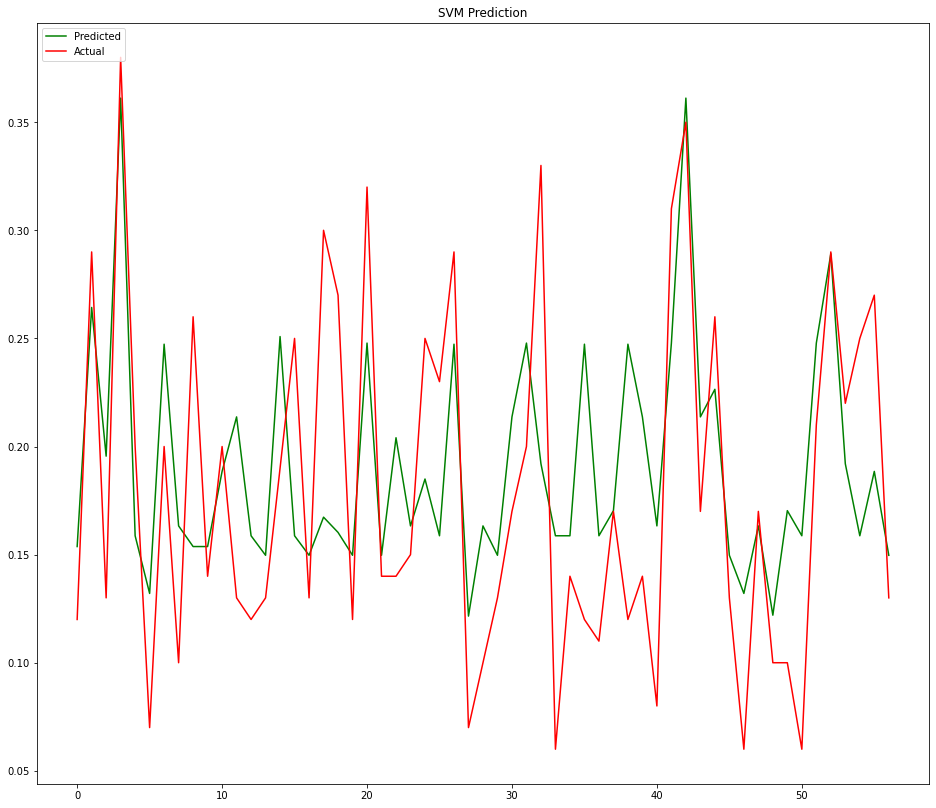

In [579]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("SVM Prediction")
rcParams['figure.figsize'] = 16, 14

In [80]:
# For Extreme Gradient Boost 

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data3.loc[:, data3.columns != 'KW']
Y = data3.loc[:, 'KW']
Model = XGBRegressor(verbosity=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.037627304282627616, RMSE:0.052144308659474635


In [81]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.09   0.127290
1     0.21   0.213023
2     0.21   0.213023
3     0.19   0.143598
4     0.08   0.127290
5     0.12   0.143749
6     0.11   0.149188
7     0.25   0.257668
8     0.06   0.076778
9     0.25   0.257668
10    0.13   0.138805
11    0.14   0.143749
12    0.22   0.190786
13    0.28   0.273415
14    0.30   0.221245
15    0.12   0.149188
16    0.17   0.277811
17    0.06   0.076778
18    0.09   0.127290
19    0.07   0.076778
20    0.15   0.149188
21    0.15   0.159325
22    0.32   0.257668
23    0.39   0.270348
24    0.12   0.159325
25    0.06   0.059334
26    0.25   0.159325
27    0.13   0.190786
28    0.33   0.221245
29    0.15   0.143598
30    0.33   0.221245
31    0.15   0.149188
32    0.06   0.077289
33    0.15   0.277811
34    0.19   0.221245
35    0.10   0.143598
36    0.37   0.362923
37    0.18   0.143749
38    0.24   0.159325
39    0.14   0.160666
40    0.08   0.127290
41    0.11   0.149188
42    0.32   0.257668
43    0.15   0.257668
44    0.12   0.149188
45    0.10   0.127290
46    0.15   0.160666
47    0.20   0.270348
48    0.13   0.138805
49    0.12   0.159325
50    0.15   0.149188
51    0.15   0.190786
52    0.13   0.128690
53    0.24   0.127290
54    0.28   0.270348
55    0.16   0.160666
56    0.07   0.076778

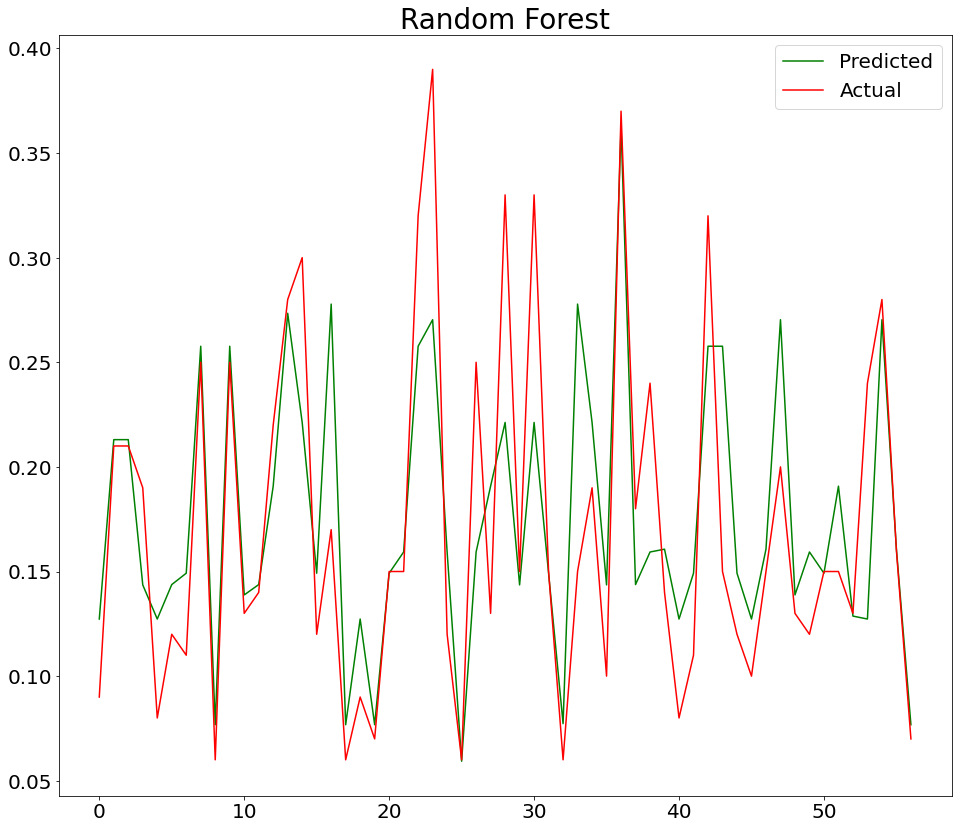

In [82]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Random Forest", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [83]:
# For Neural Network analysis

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.layers import Dense

X = data3.loc[:, data3.columns != 'KW']
Y = data3.loc[:, 'KW']
model = Sequential()
# Add the first hidden layer
model. add(Dense(200, activation='relu', input_dim=3))
# Add the second hidden layer
model.add(Dense(100, activation='relu'))
# Add the third hidden layer
model.add(Dense(50, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam',loss='mse')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.05)
# Train the model for 200 epochs
model.fit(X_train, Y_train, epochs=200, batch_size = 8, validation_data=(X_val, Y_val))
predictions = model.predict({'Predicted':X_test})
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

Epoch 1/200
128/128 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.0090
Epoch 2/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 3/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 4/200
128/128 [==============================] - 0s 963us/step - loss: 0.0040 - val_loss: 0.0043
Epoch 5/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 6/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 7/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 8/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 9/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 10/200
128/128 [==============================] - 0s 1ms/step - loss: 0.0040 - val_

In [84]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.13   0.147384
1     0.27   0.119535
2     0.22   0.194467
3     0.26   0.257413
4     0.13   0.123907
5     0.14   0.194467
6     0.14   0.150378
7     0.37   0.352925
8     0.11   0.203847
9     0.19   0.149254
10    0.25   0.257413
11    0.19   0.145819
12    0.25   0.155398
13    0.05   0.089591
14    0.12   0.150378
15    0.38   0.352925
16    0.10   0.113071
17    0.14   0.257413
18    0.30   0.269247
19    0.21   0.196695
20    0.27   0.194467
21    0.12   0.123907
22    0.32   0.292068
23    0.21   0.196695
24    0.23   0.150378
25    0.11   0.155500
26    0.11   0.150378
27    0.07   0.106793
28    0.22   0.155500
29    0.15   0.113071
30    0.20   0.257413
31    0.17   0.195521
32    0.22   0.196695
33    0.15   0.149254
34    0.14   0.150378
35    0.14   0.147384
36    0.08   0.149254
37    0.09   0.149254
38    0.19   0.194467
39    0.11   0.203847
40    0.06   0.089591
41    0.19   0.113071
42    0.32   0.257413
43    0.15   0.155500
44    0.15   0.153395
45    0.20   0.149254
46    0.15   0.150378
47    0.11   0.177796
48    0.17   0.145819
49    0.37   0.352925
50    0.30   0.195575
51    0.08   0.113071
52    0.10   0.155398
53    0.06   0.089591
54    0.33   0.257413
55    0.18   0.105389
56    0.15   0.195575

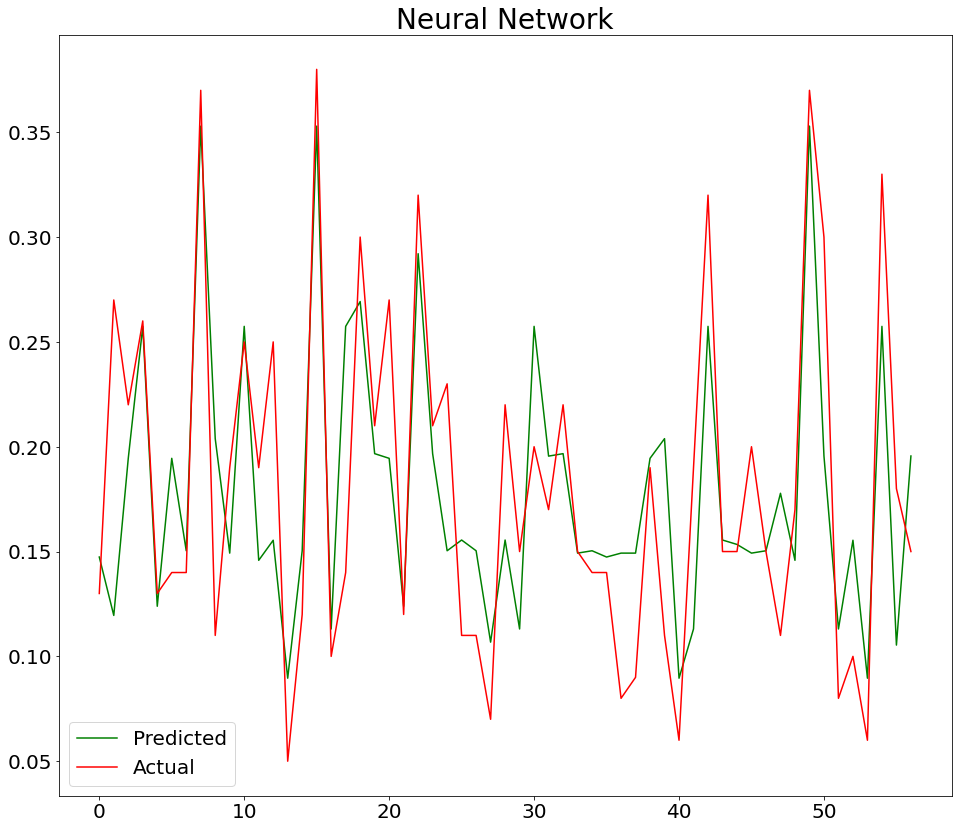

In [86]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [91]:
# For Extreme Gradient Boost 

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data3.loc[:, data3.columns != 'KW']
Y = data3.loc[:, 'KW']
Model = XGBRegressor(verbosity=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.033710528826504424, RMSE:0.046696508316117186


In [92]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.16   0.159466
1     0.15   0.257656
2     0.25   0.188827
3     0.17   0.267050
4     0.29   0.302700
5     0.30   0.267050
6     0.15   0.147229
7     0.24   0.257656
8     0.13   0.149099
9     0.23   0.225873
10    0.13   0.145709
11    0.17   0.160339
12    0.29   0.267783
13    0.13   0.145709
14    0.27   0.225873
15    0.16   0.213020
16    0.07   0.069831
17    0.33   0.257656
18    0.22   0.225873
19    0.16   0.159466
20    0.11   0.126236
21    0.06   0.069831
22    0.12   0.149099
23    0.31   0.257656
24    0.13   0.225873
25    0.13   0.149099
26    0.13   0.145709
27    0.13   0.139032
28    0.14   0.160339
29    0.11   0.117752
30    0.15   0.069831
31    0.21   0.212885
32    0.12   0.139032
33    0.15   0.149099
34    0.22   0.225873
35    0.12   0.149099
36    0.14   0.159466
37    0.12   0.149099
38    0.12   0.145709
39    0.39   0.341772
40    0.25   0.159466
41    0.09   0.144420
42    0.11   0.159466
43    0.26   0.257656
44    0.30   0.267783
45    0.15   0.159466
46    0.10   0.139714
47    0.21   0.159466
48    0.26   0.259478
49    0.14   0.213020
50    0.13   0.128750
51    0.18   0.276402
52    0.15   0.159466
53    0.18   0.159466
54    0.09   0.188827
55    0.10   0.139714
56    0.39   0.267783

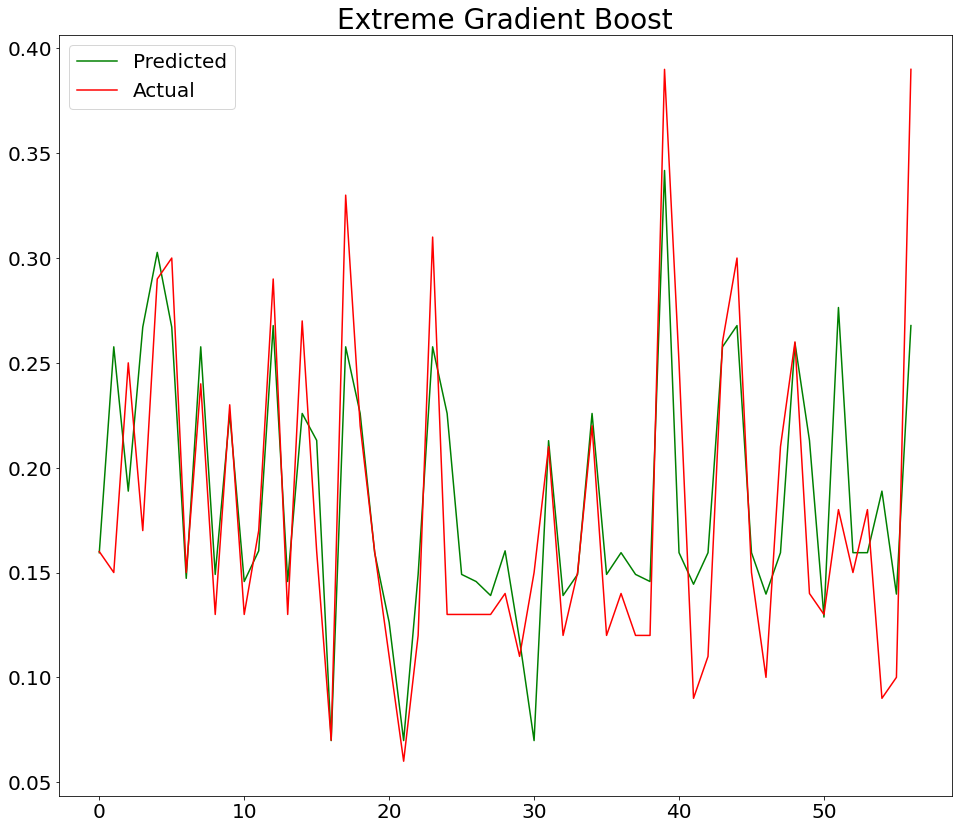

In [93]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Extreme Gradient Boost", fontsize=28)
rcParams['figure.figsize'] = 16, 14
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [94]:
# for Random forest Analysis

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data3.loc[:, data3.columns != 'KW']
y = data3.loc[:, 'KW']
models = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
model.fit(X_train, y_train)
models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.025318235867446384, RMSE:0.03551288922252955


In [95]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.16   0.277326
1     0.15   0.190602
2     0.25   0.153685
3     0.17   0.063200
4     0.29   0.184652
5     0.30   0.083199
6     0.15   0.148980
7     0.24   0.273420
8     0.13   0.130710
9     0.23   0.063200
10    0.13   0.190602
11    0.17   0.252834
12    0.29   0.190602
13    0.13   0.320566
14    0.27   0.190602
15    0.16   0.184652
16    0.07   0.328648
17    0.33   0.320566
18    0.22   0.215901
19    0.16   0.063200
20    0.11   0.063200
21    0.06   0.153685
22    0.12   0.136433
23    0.31   0.320566
24    0.13   0.215901
25    0.13   0.153685
26    0.13   0.328648
27    0.13   0.183185
28    0.14   0.252834
29    0.11   0.137581
30    0.15   0.137581
31    0.21   0.273420
32    0.12   0.183185
33    0.15   0.215901
34    0.22   0.130710
35    0.12   0.100939
36    0.14   0.083199
37    0.12   0.132043
38    0.12   0.130710
39    0.39   0.184652
40    0.25   0.190602
41    0.09   0.130710
42    0.11   0.122650
43    0.26   0.183185
44    0.30   0.158775
45    0.15   0.122650
46    0.10   0.215901
47    0.21   0.132043
48    0.26   0.184652
49    0.14   0.132043
50    0.13   0.132043
51    0.18   0.168300
52    0.15   0.361331
53    0.18   0.146337
54    0.09   0.158775
55    0.10   0.184652
56    0.39   0.184652

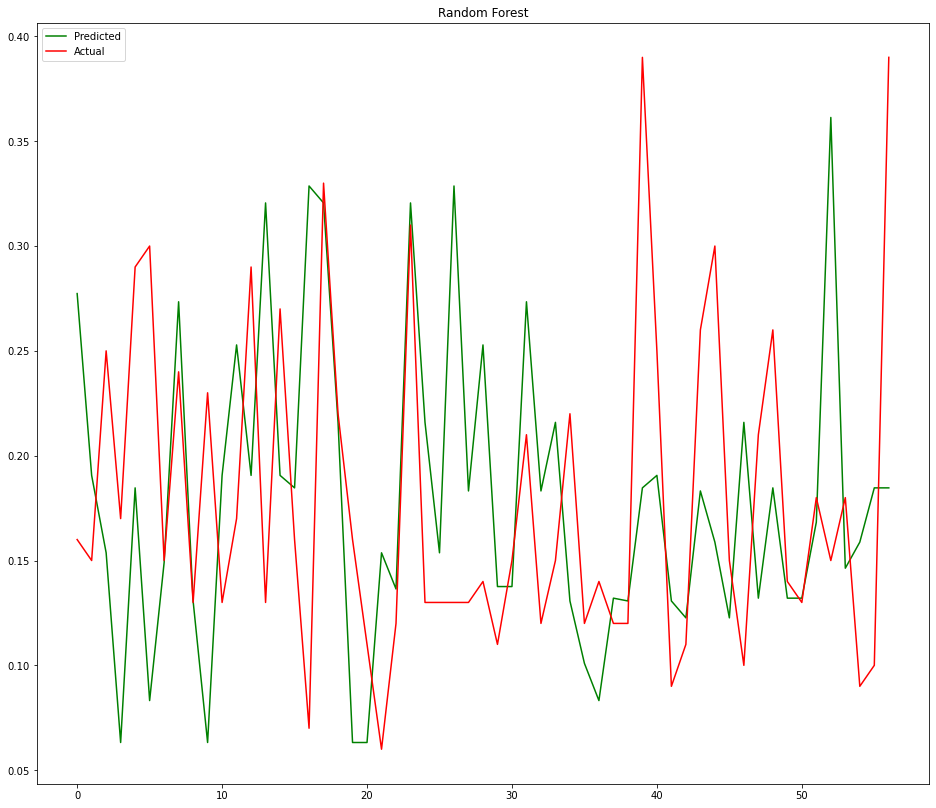

In [96]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Random Forest")
rcParams['figure.figsize'] = 16, 14

In [545]:
# For decision tree analysis

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn.ensemble as ml

X = data3.drop(['KW'], axis=1)
y = data3['KW']
#model = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
#predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))
gbmt = ml.GradientBoostingRegressor(max_depth=10, 
                           min_samples_leaf=0.1, 
                           random_state=2)
gbmt.fit(X_test, y_test)
predictions = gbmt.predict(X_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0032
MAE:0.0912388351558671, RMSE:0.11411625866901556


In [546]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.06   0.196214
1     0.08   0.251375
2     0.30   0.151285
3     0.28   0.138257
4     0.28   0.251375
5     0.14   0.322612
6     0.16   0.134648
7     0.30   0.202092
8     0.25   0.262134
9     0.13   0.150867
10    0.23   0.114343
11    0.11   0.134648
12    0.25   0.134648
13    0.21   0.138257
14    0.25   0.150867
15    0.27   0.138257
16    0.12   0.244922
17    0.14   0.137170
18    0.14   0.195698
19    0.31   0.137170
20    0.31   0.121118
21    0.27   0.137170
22    0.26   0.251375
23    0.16   0.158333
24    0.14   0.157667
25    0.06   0.134648
26    0.18   0.150867
27    0.34   0.207887
28    0.14   0.130564
29    0.09   0.251375
30    0.12   0.138257
31    0.14   0.251375
32    0.18   0.251375
33    0.12   0.134648
34    0.29   0.164626
35    0.15   0.164626
36    0.25   0.207887
37    0.09   0.138257
38    0.38   0.322612
39    0.13   0.138257
40    0.17   0.164626
41    0.15   0.128630
42    0.20   0.134648
43    0.07   0.151285
44    0.12   0.191131
45    0.31   0.251375
46    0.22   0.134648
47    0.39   0.134648
48    0.12   0.198148
49    0.36   0.251375
50    0.27   0.151285
51    0.13   0.134648
52    0.12   0.138257
53    0.14   0.130564
54    0.25   0.150867
55    0.16   0.198148
56    0.06   0.130564
57    0.11   0.130564
58    0.17   0.251375
59    0.28   0.198148
60    0.20   0.138257
61    0.10   0.195698
62    0.39   0.251375
63    0.30   0.134648
64    0.18   0.322612
65    0.17   0.158333
66    0.26   0.290166
67    0.29   0.130564
68    0.24   0.251375
69    0.07   0.134648
70    0.13   0.138257
71    0.31   0.322612
72    0.27   0.138257
73    0.21   0.196214
74    0.10   0.195698
75    0.24   0.121118
76    0.21   0.244922
77    0.14   0.137170
78    0.25   0.322612
79    0.24   0.157667
80    0.24   0.134648
81    0.27   0.114343
82    0.34   0.137170
83    0.18   0.191131
84    0.09   0.322612
85    0.21   0.322612
86    0.11   0.138257
87    0.20   0.137170
88    0.29   0.322612
89    0.16   0.114343
90    0.33   0.150867
91    0.13   0.150867
92    0.18   0.164626
93    0.28   0.130564
94    0.06   0.207887
95    0.12   0.164626
96    0.13   0.138257
97    0.35   0.151285
98    0.19   0.196214
99    0.26   0.134648

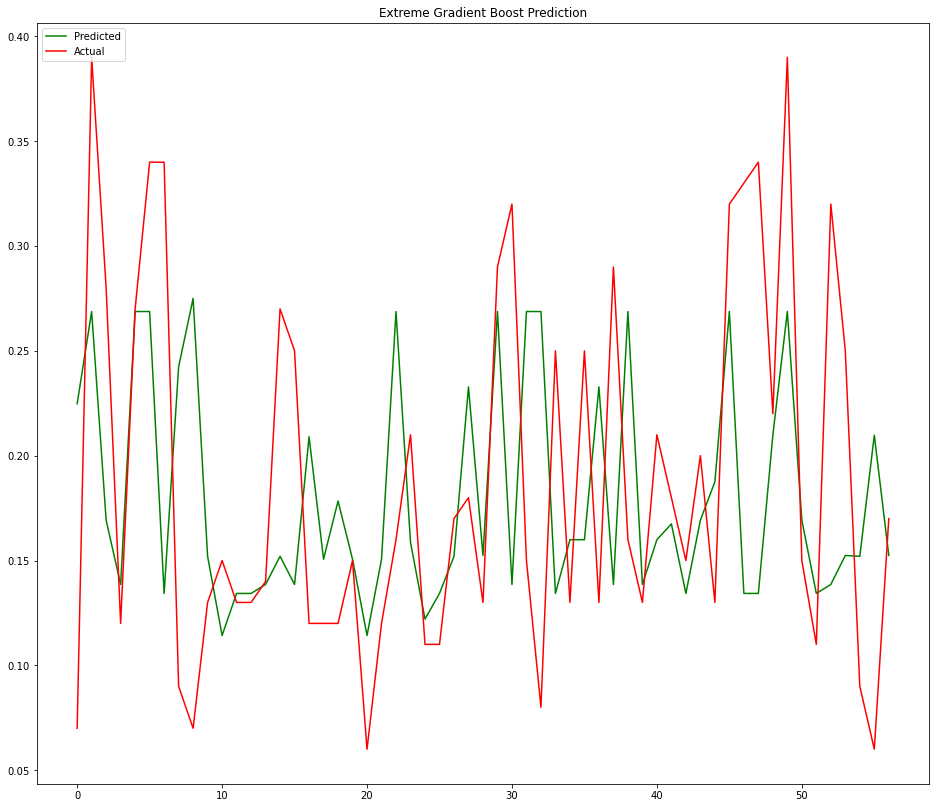

In [345]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Extreme Gradient Boost Prediction")
rcParams['figure.figsize'] = 16, 14

In [548]:
# for K-Nearest Neighbor Analysis

import sklearn.svm as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

X = data3.drop(['KW'], axis=1)
y = data3['KW']
models = KNeighborsRegressor(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.1)
model.fit(X_train, y_train)

models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

32/32 [==============================] - 0s 2ms/step - loss: 0.0032
MAE:0.037236842105263165, RMSE:0.051429137075697434


In [549]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.06      0.220
1     0.08      0.195
2     0.30      0.155
3     0.28      0.060
4     0.28      0.115
5     0.14      0.075
6     0.16      0.135
7     0.30      0.305
8     0.25      0.145
9     0.13      0.060
10    0.23      0.195
11    0.11      0.240
12    0.25      0.195
13    0.21      0.345
14    0.25      0.195
15    0.27      0.115
16    0.12      0.330
17    0.14      0.345
18    0.14      0.215
19    0.31      0.060
20    0.31      0.060
21    0.27      0.155
22    0.26      0.100
23    0.16      0.345
24    0.14      0.215
25    0.06      0.155
26    0.18      0.330
27    0.34      0.200
28    0.14      0.240
29    0.09      0.135
30    0.12      0.135
31    0.14      0.305
32    0.18      0.200
33    0.12      0.215
34    0.29      0.145
35    0.15      0.135
36    0.25      0.075
37    0.09      0.165
38    0.38      0.145
39    0.13      0.115
40    0.17      0.195
41    0.15      0.145
42    0.20      0.105
43    0.07      0.200
44    0.12      0.140
45    0.31      0.105
46    0.22      0.215
47    0.39      0.165
48    0.12      0.115
49    0.36      0.165
50    0.27      0.165
51    0.13      0.155
52    0.12      0.340
53    0.14      0.120
54    0.25      0.140
55    0.16      0.115
56    0.06      0.115
57    0.11      0.195
58    0.17      0.200
59    0.28      0.200
60    0.20      0.145
61    0.10      0.215
62    0.39      0.180
63    0.30      0.115
64    0.18      0.220
65    0.17      0.115
66    0.26      0.215
67    0.29      0.215
68    0.24      0.115
69    0.07      0.115
70    0.13      0.115
71    0.31      0.305
72    0.27      0.345
73    0.21      0.240
74    0.10      0.165
75    0.24      0.115
76    0.21      0.140
77    0.14      0.060
78    0.25      0.145
79    0.24      0.165
80    0.24      0.215
81    0.27      0.140
82    0.34      0.195
83    0.18      0.205
84    0.09      0.280
85    0.21      0.120
86    0.11      0.185
87    0.20      0.060
88    0.29      0.200
89    0.16      0.195
90    0.33      0.330
91    0.13      0.195
92    0.18      0.200
93    0.28      0.275
94    0.06      0.330
95    0.12      0.165
96    0.13      0.125
97    0.35      0.195
98    0.19      0.215
99    0.26      0.135

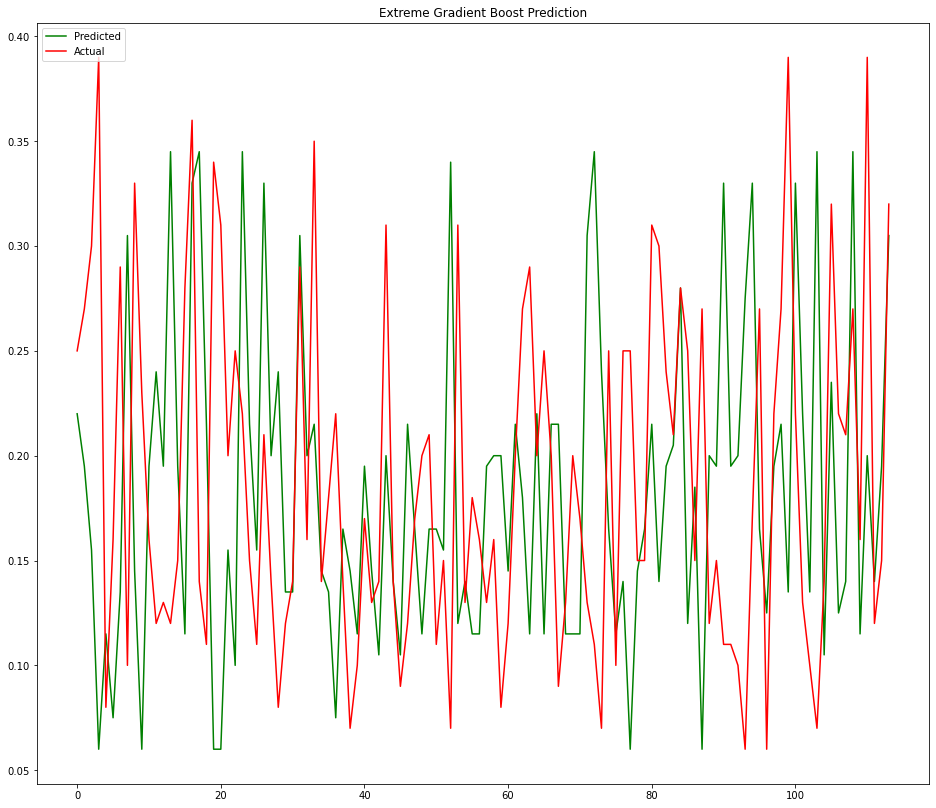

In [466]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Extreme Gradient Boost Prediction")
rcParams['figure.figsize'] = 16, 14

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

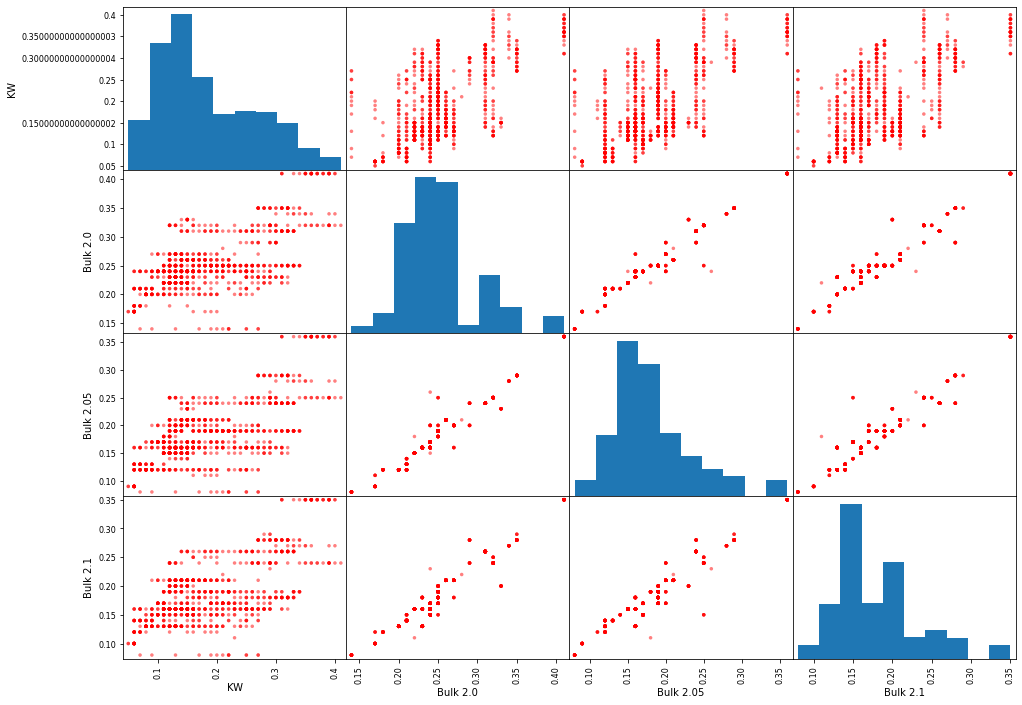

In [346]:
data3.corr()
data3.corr()['KW'].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
scatter_matrix(data3, figsize=(16,12), color='r', s=50)
plt.yticks(fontsize=14)

In [347]:
shade = np.zeros_like(data3.corr())
triangle_indices = np.triu_indices_from(shade)
shade[triangle_indices] = True
shade

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

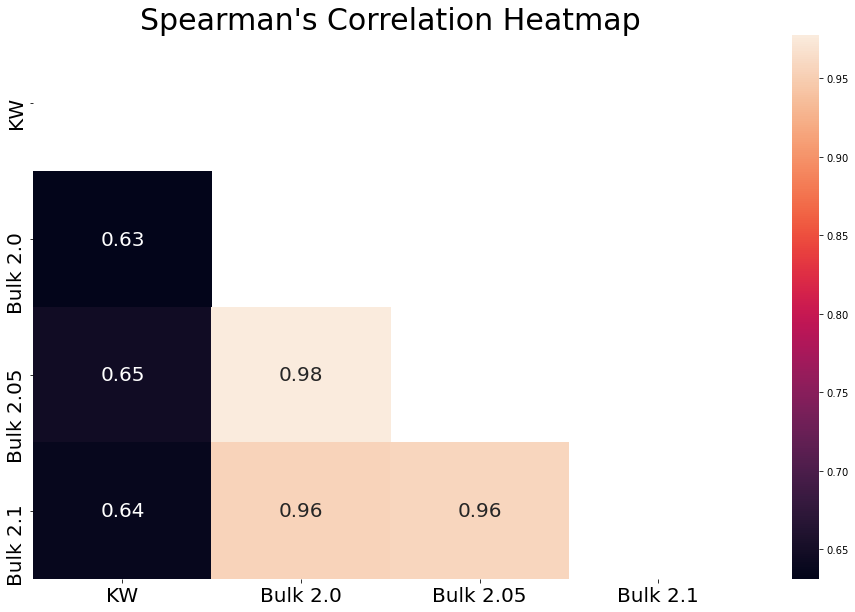

In [348]:
plt.figure(figsize=(16,10))
sns.heatmap(data3.corr(), mask=shade, annot=True, annot_kws={"size":20})
plt.show
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Spearman's Correlation Heatmap", fontsize=30)
plt.show()

In [404]:
# Using Data 4 for Analysis: This comprise Synthetic Data of density-porosity using a CONSTANT Bulk density for F/9-11-T2.

In [550]:
data4 = pd.read_csv(r"C:\PhD Work\PhD Papers\About Third Paper\Sieved\Poro_Data4.csv")
data4.head(50)

KW  Bulk 2.0  Bulk 2.05  Bulk 2.1
0   0.26      0.30       0.27      0.23
1   0.27      0.30       0.27      0.23
2   0.27      0.30       0.27      0.23
3   0.26      0.31       0.25      0.26
4   0.26      0.31       0.25      0.26
5   0.26      0.30       0.31      0.26
6   0.27      0.30       0.31      0.26
7   0.27      0.26       0.25      0.21
8   0.27      0.26       0.25      0.21
9   0.27      0.29       0.26      0.22
10  0.26      0.29       0.26      0.22
11  0.26      0.29       0.26      0.22
12  0.27      0.29       0.26      0.22
13  0.27      0.29       0.26      0.22
14  0.27      0.29       0.26      0.22
15  0.27      0.29       0.26      0.22
16  0.27      0.29       0.26      0.22
17  0.28      0.29       0.26      0.22
18  0.28      0.29       0.28      0.23
19  0.27      0.29       0.28      0.23
20  0.26      0.29       0.28      0.23
21  0.26      0.29       0.28      0.23
22  0.26      0.29       0.28      0.23
23  0.26      0.29       0.28      0.23
24  0.26      0.29       0.28      0.23
25  0.26      0.29       0.28      0.23
26  0.26      0.29       0.28      0.23
27  0.27      0.29       0.28      0.23
28  0.26      0.29       0.28      0.23
29  0.26      0.29       0.28      0.23
30  0.26      0.29       0.28      0.23
31  0.26      0.29       0.28      0.23
32  0.26      0.29       0.28      0.23
33  0.26      0.29       0.28      0.23
34  0.26      0.29       0.28      0.23
35  0.26      0.29       0.28      0.23
36  0.26      0.29       0.28      0.23
37  0.26      0.29       0.28      0.23
38  0.26      0.29       0.28      0.23
39  0.27      0.30       0.28      0.24
40  0.27      0.30       0.28      0.24
41  0.27      0.30       0.28      0.24
42  0.27      0.30       0.28      0.24
43  0.28      0.30       0.28      0.24
44  0.28      0.30       0.28      0.24
45  0.27      0.30       0.28      0.24
46  0.27      0.30       0.28      0.24
47  0.27      0.30       0.28      0.24
48  0.27      0.30       0.28      0.24
49  0.28      0.30       0.28      0.24

In [551]:
# For Multiple linear regression model

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data4.loc[:, data4.columns != 'KW']
Y = data4.loc[:, 'KW']
Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.031703360059470644, RMSE:0.04268847187307907


In [552]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.26   0.264932
1     0.25   0.237630
2     0.18   0.227497
3     0.25   0.227497
4     0.27   0.282824
5     0.25   0.237630
6     0.29   0.307753
7     0.26   0.282824
8     0.24   0.310848
9     0.35   0.311731
10    0.25   0.265734
11    0.26   0.217365
12    0.24   0.240805
13    0.20   0.217365
14    0.32   0.311731
15    0.23   0.255602
16    0.32   0.292876
17    0.36   0.307753
18    0.26   0.268909
19    0.18   0.227497
20    0.24   0.255602
21    0.28   0.280532
22    0.21   0.217365
23    0.35   0.265734
24    0.26   0.268909
25    0.22   0.255602
26    0.28   0.280532
27    0.18   0.227497
28    0.26   0.291466
29    0.18   0.268027
30    0.25   0.308556
31    0.25   0.237630
32    0.37   0.324958
33    0.24   0.268027
34    0.27   0.311731
35    0.28   0.311731
36    0.30   0.255602
37    0.18   0.217365
38    0.38   0.307753
39    0.18   0.237630
40    0.18   0.265734
41    0.37   0.311731
42    0.24   0.240805
43    0.26   0.255602
44    0.25   0.255602
45    0.23   0.227497
46    0.30   0.265734
47    0.16   0.265734
48    0.30   0.291466
49    0.24   0.255602
50    0.23   0.255602
51    0.36   0.265734
52    0.25   0.268909
53    0.28   0.288291
54    0.33   0.292876
55    0.29   0.278159
56    0.30   0.262559
57    0.27   0.273494
58    0.29   0.280532
59    0.24   0.237630
60    0.28   0.273494
61    0.28   0.268829
62    0.35   0.265734
63    0.39   0.268027
64    0.38   0.298423
65    0.25   0.255602
66    0.31   0.282824
67    0.26   0.268829
68    0.23   0.217365
69    0.30   0.268027

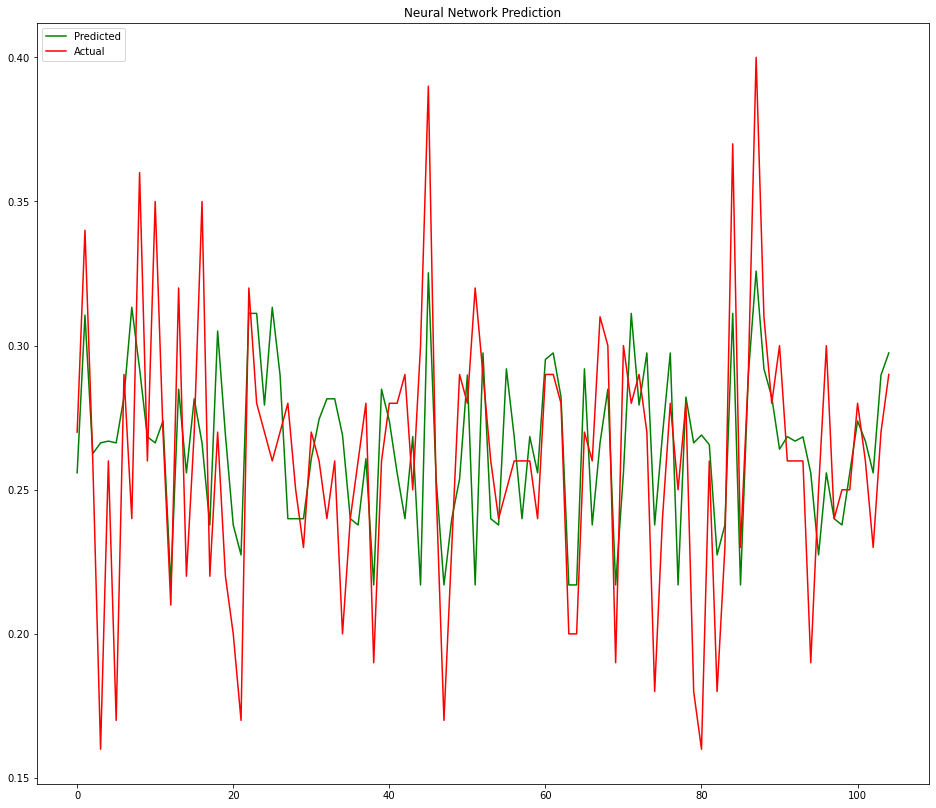

In [385]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

In [554]:
# for K-Nearest Neighbor Analysis

import sklearn.svm as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

X = data4.drop(['KW'], axis=1)
y = data4['KW']
models = KNeighborsRegressor(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.1)
model.fit(X_train, y_train)

models.fit(X_test, y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.025785714285714287, RMSE:0.04613257293620513


In [555]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.26      0.180
1     0.25      0.320
2     0.18      0.305
3     0.25      0.320
4     0.27      0.295
5     0.25      0.270
6     0.29      0.255
7     0.26      0.190
8     0.24      0.290
9     0.35      0.275
10    0.25      0.235
11    0.26      0.300
12    0.24      0.210
13    0.20      0.280
14    0.32      0.320
15    0.23      0.235
16    0.32      0.305
17    0.36      0.270
18    0.26      0.190
19    0.18      0.350
20    0.24      0.180
21    0.28      0.275
22    0.21      0.190
23    0.35      0.275
24    0.26      0.275
25    0.22      0.290
26    0.28      0.235
27    0.18      0.415
28    0.26      0.320
29    0.18      0.255
30    0.25      0.290
31    0.25      0.415
32    0.37      0.190
33    0.24      0.235
34    0.27      0.210
35    0.28      0.255
36    0.30      0.190
37    0.18      0.235
38    0.38      0.280
39    0.18      0.255
40    0.18      0.265
41    0.37      0.320
42    0.24      0.265
43    0.26      0.245
44    0.25      0.290
45    0.23      0.270
46    0.30      0.290
47    0.16      0.415
48    0.30      0.320
49    0.24      0.235
50    0.23      0.210
51    0.36      0.235
52    0.25      0.270
53    0.28      0.190
54    0.33      0.180
55    0.29      0.275
56    0.30      0.235
57    0.27      0.275
58    0.29      0.270
59    0.24      0.265
60    0.28      0.280
61    0.28      0.320
62    0.35      0.290
63    0.39      0.275
64    0.38      0.300
65    0.25      0.360
66    0.31      0.210
67    0.26      0.270
68    0.23      0.255
69    0.30      0.305

In [389]:
# For Extreme Gradient Boost 

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data4.loc[:, data4.columns != 'KW']
Y = data4.loc[:, 'KW']
Model = XGBRegressor(verbosity=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)
model = Model.fit(X_train, Y_train)
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.016283729399953567, RMSE:0.02475908136814074


In [391]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)

Actual  Predicted
0     0.21   0.221331
1     0.26   0.262443
2     0.27   0.280348
3     0.26   0.262443
4     0.30   0.298221
5     0.26   0.280348
6     0.30   0.293137
7     0.27   0.274921
8     0.26   0.259382
9     0.25   0.239172
10    0.24   0.241049
11    0.28   0.280172
12    0.28   0.241049
13    0.30   0.326808
14    0.31   0.293137
15    0.24   0.239172
16    0.24   0.221331
17    0.32   0.369665
18    0.23   0.241049
19    0.29   0.340808
20    0.27   0.274921
21    0.19   0.265888
22    0.20   0.221331
23    0.22   0.209900
24    0.33   0.264819
25    0.26   0.262443
26    0.23   0.239172
27    0.28   0.280348
28    0.35   0.318287
29    0.24   0.262011
30    0.27   0.261057
31    0.26   0.262443
32    0.24   0.252086
33    0.27   0.274921
34    0.27   0.258356

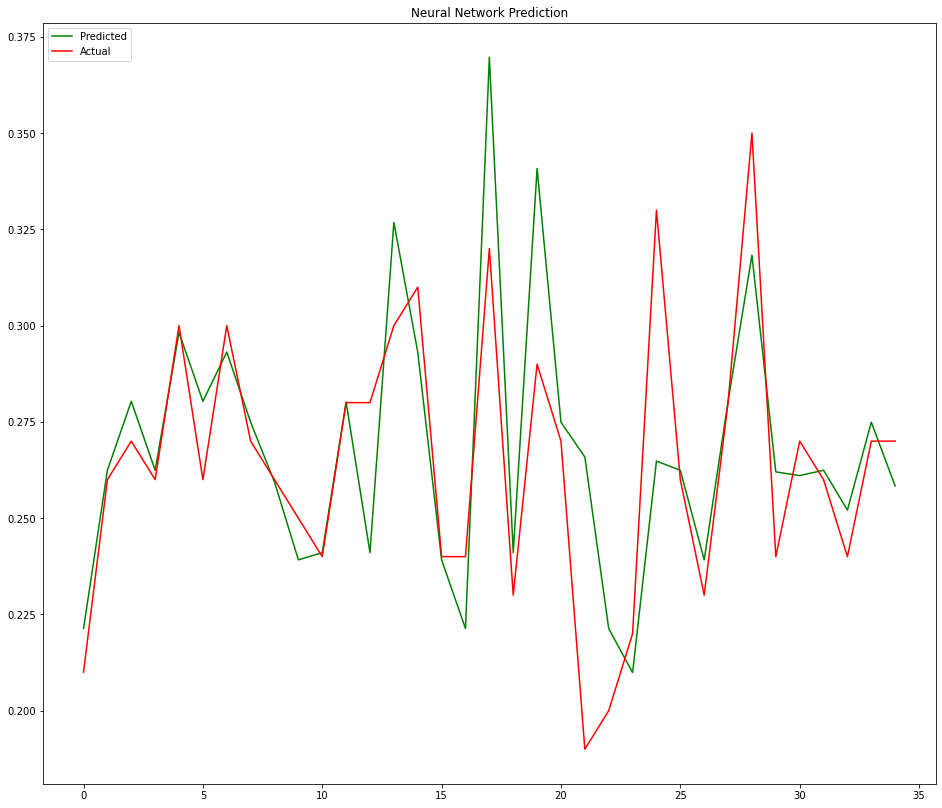

In [392]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

In [556]:
# For Neural Network analysis

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

X = data4.loc[:, data4.columns != 'KW']
Y = data4.loc[:, 'KW']
model = Sequential()
# Add the first hidden layer
model. add(Dense(100, activation='relu', input_dim=3))
# Add the second hidden layer
model.add(Dense(50, activation='relu'))
# Add the third hidden layer
model.add(Dense(25, activation='relu'))
# Add the fourth hidden layer
model.add(Dense(5, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam',loss='mse')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)
# Train the model for 200 epochs
model.fit(X_train, Y_train, epochs=200, batch_size = 8, validation_data=(X_val, Y_val))
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict({'Predicted':X_test})
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

Epoch 1/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0040
Epoch 2/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 3/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 4/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 5/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 8/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 9/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 11/

In [557]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.18   0.267049
1     0.26   0.272721
2     0.24   0.245457
3     0.26   0.236021
4     0.25   0.317473
5     0.32   0.293095
6     0.26   0.317473
7     0.31   0.293095
8     0.27   0.319282
9     0.28   0.282961
10    0.33   0.293095
11    0.28   0.282961
12    0.26   0.319282
13    0.26   0.257268
14    0.26   0.257268
15    0.26   0.280613
16    0.28   0.298785
17    0.25   0.245457
18    0.23   0.257268
19    0.30   0.313797
20    0.30   0.270657
21    0.24   0.274666
22    0.26   0.276199
23    0.18   0.236021
24    0.27   0.298785
25    0.27   0.298785
26    0.22   0.274666
27    0.27   0.267049
28    0.16   0.274666
29    0.29   0.317473
30    0.20   0.274666
31    0.29   0.317877
32    0.28   0.298785
33    0.26   0.267049
34    0.30   0.317877
35    0.28   0.282961
36    0.21   0.274666
37    0.19   0.267049
38    0.27   0.293095
39    0.33   0.320520
40    0.27   0.278671
41    0.37   0.274666
42    0.29   0.260806
43    0.27   0.278671
44    0.27   0.302170
45    0.20   0.228247
46    0.19   0.228247
47    0.29   0.316184
48    0.26   0.319282
49    0.26   0.268983
50    0.25   0.245457
51    0.22   0.257268
52    0.27   0.293095
53    0.28   0.302170
54    0.25   0.319282
55    0.18   0.228247
56    0.35   0.313797
57    0.23   0.242047
58    0.35   0.267049
59    0.26   0.272721
60    0.26   0.236021
61    0.26   0.242047
62    0.28   0.278671
63    0.25   0.228247
64    0.30   0.320868
65    0.16   0.267049
66    0.28   0.257268
67    0.20   0.228247
68    0.19   0.274666
69    0.26   0.293095

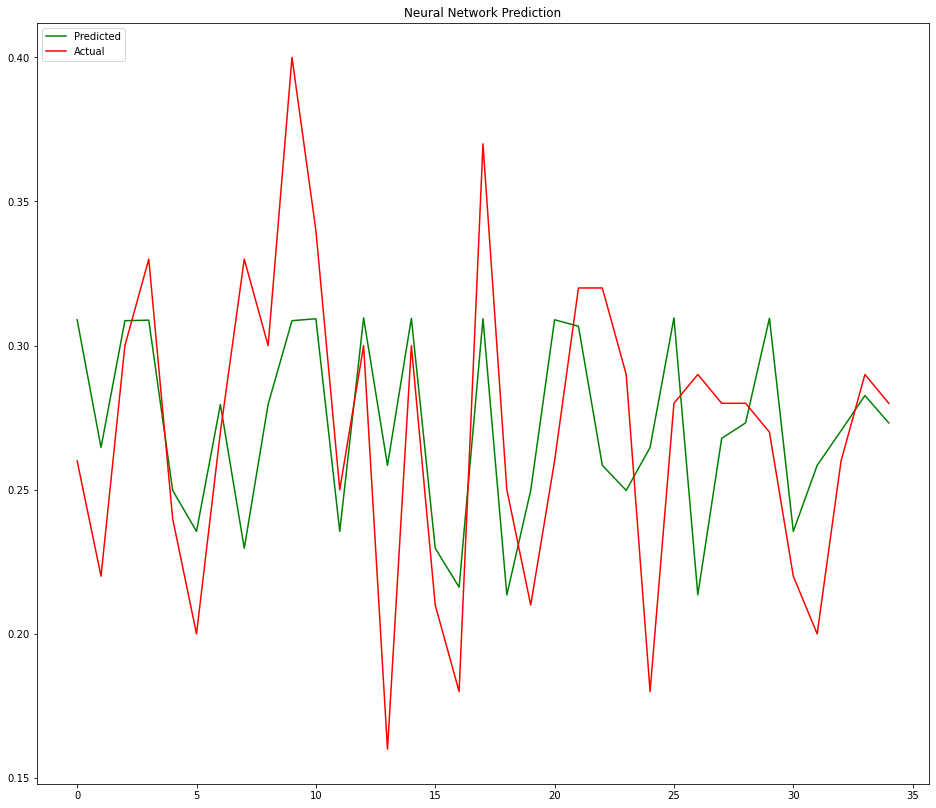

In [364]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

In [558]:
# For decision tree analysis

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn.ensemble as ml

X = data4.loc[:, data4.columns != 'KW']
Y = data4.loc[:, 'KW']
model = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.12)
model.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.026750667658875602, RMSE:0.039576631560807554


In [559]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.30   0.298824
1     0.31   0.320526
2     0.25   0.209412
3     0.27   0.265000
4     0.33   0.260488
5     0.18   0.209412
6     0.18   0.267333
7     0.26   0.220000
8     0.32   0.264706
9     0.28   0.280833
10    0.28   0.279583
11    0.19   0.220000
12    0.25   0.260488
13    0.29   0.298824
14    0.28   0.271667
15    0.28   0.279583
16    0.28   0.239412
17    0.27   0.262500
18    0.31   0.260488
19    0.40   0.326000
20    0.30   0.239412
21    0.21   0.220000
22    0.18   0.248261
23    0.30   0.220000
24    0.29   0.296250
25    0.29   0.281667
26    0.35   0.283871
27    0.31   0.309091
28    0.26   0.260000
29    0.30   0.296250
30    0.24   0.248261
31    0.25   0.259167
32    0.40   0.248261
33    0.25   0.267333
34    0.30   0.273333
35    0.27   0.271667
36    0.24   0.237308
37    0.19   0.267333
38    0.27   0.336667
39    0.30   0.298333
40    0.26   0.220000
41    0.28   0.281667
42    0.26   0.239412
43    0.35   0.267333
44    0.27   0.281429
45    0.26   0.296250
46    0.26   0.237308
47    0.20   0.220000
48    0.27   0.268750
49    0.40   0.326000
50    0.24   0.248261
51    0.27   0.271667
52    0.27   0.279583
53    0.26   0.265000
54    0.24   0.237308
55    0.29   0.326000
56    0.43   0.365217
57    0.30   0.326000
58    0.18   0.267333
59    0.26   0.281429
60    0.27   0.279583
61    0.24   0.237308
62    0.28   0.336667
63    0.33   0.309091
64    0.26   0.260488
65    0.26   0.260000
66    0.24   0.209412
67    0.27   0.280833
68    0.27   0.281429
69    0.29   0.267333
70    0.23   0.239412
71    0.25   0.237308
72    0.28   0.281429
73    0.18   0.209412
74    0.18   0.220000
75    0.21   0.260488
76    0.30   0.298824
77    0.22   0.209412
78    0.39   0.322857
79    0.27   0.264706
80    0.30   0.296250
81    0.32   0.336667
82    0.25   0.237308
83    0.23   0.220000

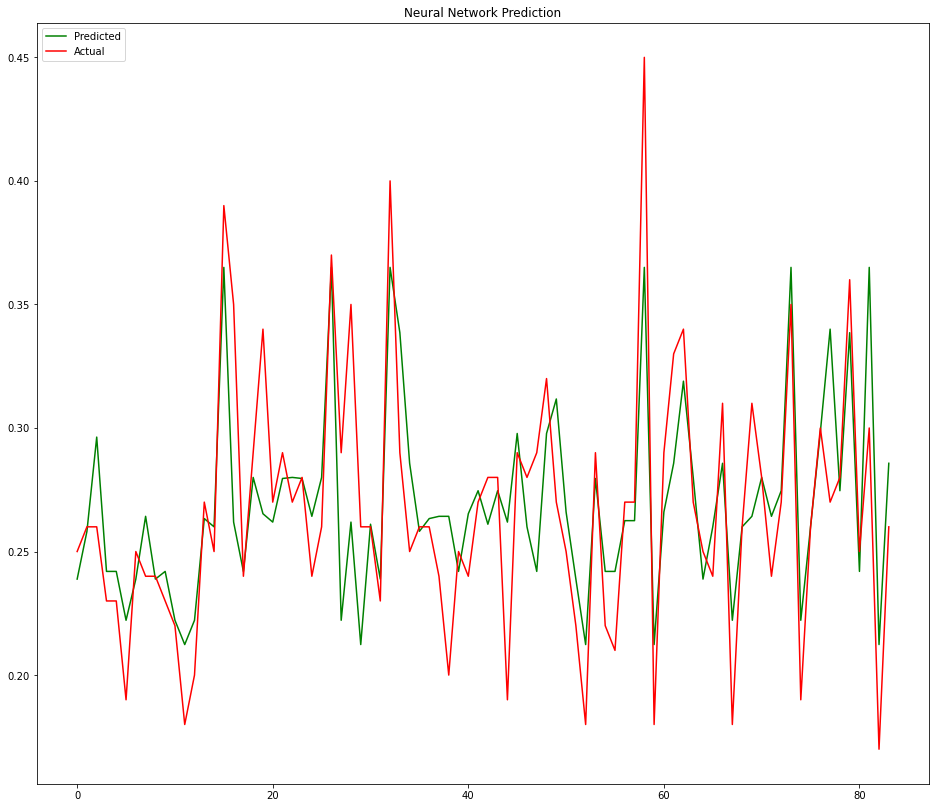

In [436]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

In [560]:
# for Random forest Analysis

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = data4.loc[:, data4.columns != 'KW']
Y = data4.loc[:, 'KW']
models = RandomForestRegressor(n_estimators=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
model.fit(X_train, Y_train)
models.fit(X_test, Y_test)
predictions = models.predict(X_test)
metric_mae = mean_absolute_error(Y_test,predictions)
metric_rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print('MAE:{}, RMSE:{}'.format(metric_mae, metric_rmse))

MAE:0.02101359982780995, RMSE:0.02985337576991277


In [561]:
df1 = pd.DataFrame({'Actual': round(Y_test,2)})
df2 = pd.DataFrame(predictions)
df2.columns = ['Predicted']
Y= pd.concat([d.reset_index(drop=True) for d in [df1, df2]], axis=1)
Y
pd.set_option('display.max_rows', 100)
Y.head(100)

Actual  Predicted
0     0.28   0.275197
1     0.25   0.260247
2     0.35   0.303077
3     0.19   0.209514
4     0.22   0.222521
5     0.24   0.222521
6     0.28   0.242867
7     0.18   0.222521
8     0.30   0.279878
9     0.26   0.252944
10    0.33   0.306375
11    0.38   0.354744
12    0.24   0.222521
13    0.27   0.303077
14    0.29   0.287400
15    0.27   0.270765
16    0.27   0.269592
17    0.21   0.209514
18    0.27   0.267242
19    0.35   0.354744
20    0.27   0.269242
21    0.27   0.275197
22    0.25   0.249692
23    0.35   0.260247
24    0.27   0.269592
25    0.25   0.249692
26    0.23   0.242867
27    0.17   0.209514
28    0.18   0.260247
29    0.25   0.252944
30    0.26   0.267242
31    0.32   0.354744
32    0.30   0.242867
33    0.23   0.242867
34    0.25   0.209514
35    0.28   0.284070
36    0.30   0.306000
37    0.28   0.284070
38    0.18   0.222521
39    0.18   0.260247
40    0.32   0.306000
41    0.24   0.249692
42    0.27   0.269242
43    0.25   0.277271
44    0.29   0.275197
45    0.28   0.295772
46    0.23   0.260247
47    0.30   0.260247
48    0.22   0.242867
49    0.23   0.215021
50    0.22   0.215021
51    0.29   0.315180
52    0.28   0.306375
53    0.22   0.209514
54    0.26   0.274840
55    0.20   0.242867
56    0.31   0.277271
57    0.26   0.249692
58    0.35   0.260247
59    0.26   0.267343
60    0.23   0.222521
61    0.18   0.215021
62    0.27   0.267242
63    0.28   0.267343
64    0.26   0.275197
65    0.35   0.315180
66    0.37   0.354744
67    0.26   0.222521
68    0.29   0.283400
69    0.23   0.222521

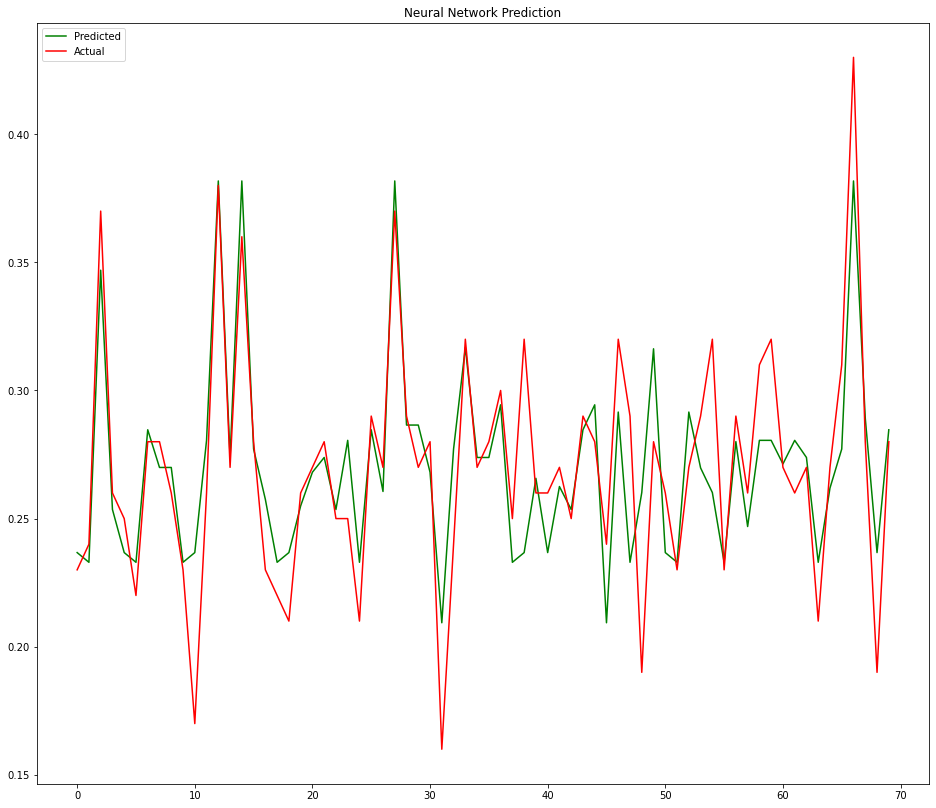

In [423]:
pred = plt.plot(predictions, color='g', label='Predicted')
Act = plt.plot(Y_test.values, color='r', label='Actual')
plt.legend(loc="upper left")
plt.title("Neural Network Prediction")
rcParams['figure.figsize'] = 16, 14

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

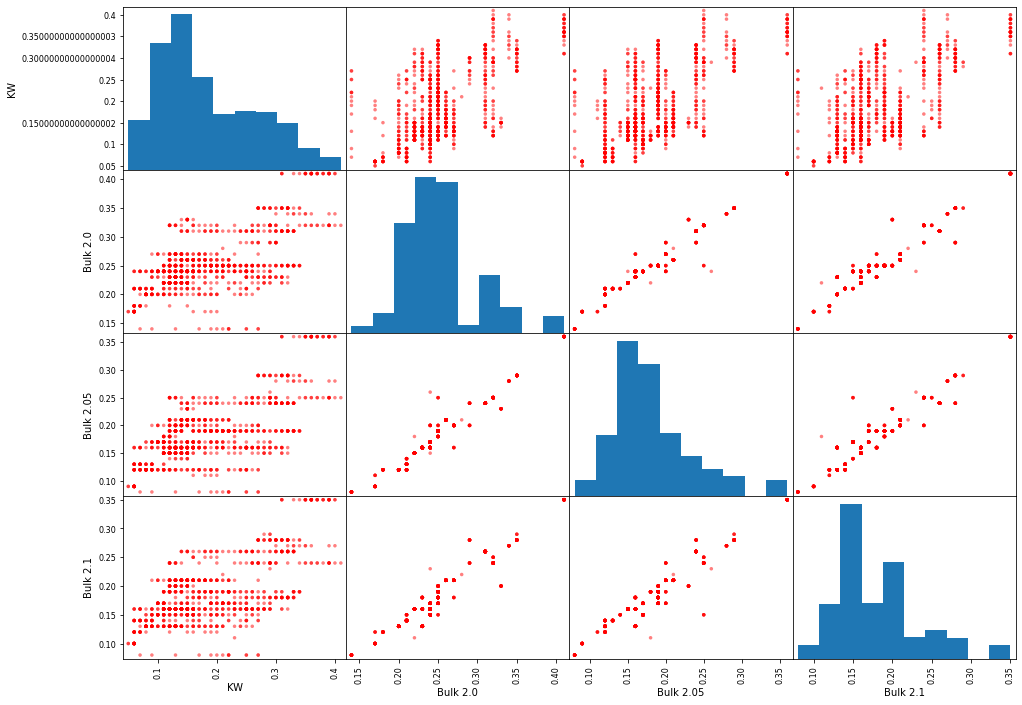

In [437]:
data4.corr()
data4.corr()['KW'].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
scatter_matrix(data3, figsize=(16,12), color='r', s=50)
plt.yticks(fontsize=14)

In [438]:
shade = np.zeros_like(data4.corr())
triangle_indices = np.triu_indices_from(shade)
shade[triangle_indices] = True
shade

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

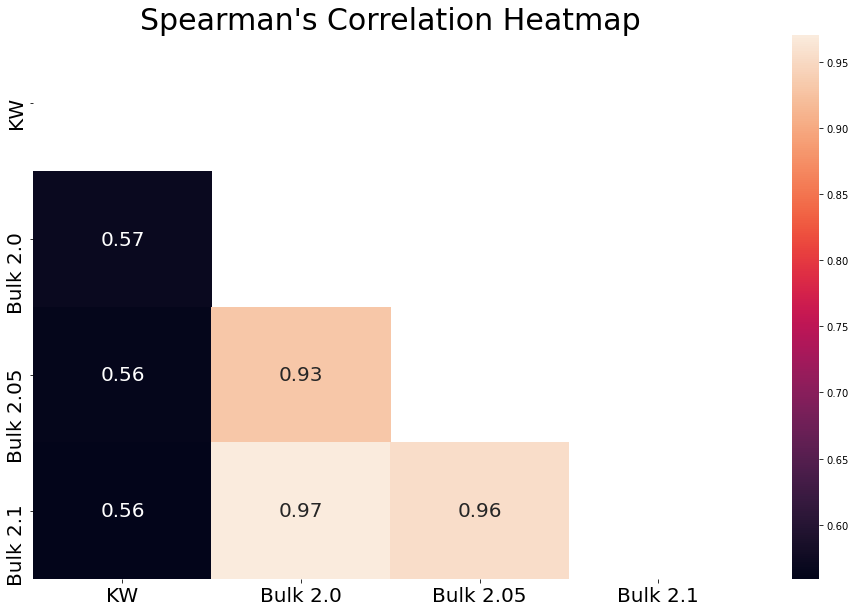

In [439]:
plt.figure(figsize=(16,10))
sns.heatmap(data4.corr(), mask=shade, annot=True, annot_kws={"size":20})
plt.show
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Spearman's Correlation Heatmap", fontsize=30)
plt.show()